In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta
import matplotlib

df1 = pd.read_csv("../../data/raw/smard/smard_consumption_DE.csv", sep=";")
df2 = pd.read_csv("../../data/raw/smard/smard_generation_DE.csv", sep=";")

## First look

In [59]:
df1.describe()


,Date,Start,End,Total (grid load) [MWh] Calculated resolutions,Residual load [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions
count,78888,78888,78888,78888,78888,78888
unique,3287,24,24,61088,64335,18888
top,"Oct 30, 2016",12:00 AM,1:00 AM,"45,937","34,007.25",0
freq,25,3287,3287,7,6,579


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Date                                               78888 non-null  object
 1   Start                                              78888 non-null  object
 2   End                                                78888 non-null  object
 3   Total (grid load) [MWh] Calculated resolutions     78888 non-null  object
 4   Residual load [MWh] Calculated resolutions         78888 non-null  object
 5   Hydro pumped storage [MWh] Calculated resolutions  78888 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [61]:
df1.head()

,Date,Start,End,Total (grid load) [MWh] Calculated resolutions,Residual load [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions
0,"Jan 1, 2015",12:00 AM,1:00 AM,"44,600.25","35,955.75",601.5
1,"Jan 1, 2015",1:00 AM,2:00 AM,"43,454.75","34,641",346.25
2,"Jan 1, 2015",2:00 AM,3:00 AM,"41,963.25","32,909.25",521.75
3,"Jan 1, 2015",3:00 AM,4:00 AM,"40,617.75","31,548","1,228.25"
4,"Jan 1, 2015",4:00 AM,5:00 AM,"39,936.75","30,773.5","1,821.5"


In [62]:
df1["date"] = pd.to_datetime(df1['Date'] + ' ' + df1['Start'], format='%b %d, %Y %I:%M %p')
df1 = df1.drop(columns=["Date", "Start", "End"])
df1 = df1.rename(columns={"Total (grid load) [MWh] Calculated resolutions": "load"})
df1 = df1[["date"] + ["load"]]
df1["load"] = df1["load"].str.replace(',', '').astype(float)
df1

,date,load
0,2015-01-01 00:00:00,44600.25
1,2015-01-01 01:00:00,43454.75
2,2015-01-01 02:00:00,41963.25
3,2015-01-01 03:00:00,40617.75
4,2015-01-01 04:00:00,39936.75
...,...,...
78883,2023-12-31 19:00:00,50254.75
78884,2023-12-31 20:00:00,47086.50
78885,2023-12-31 21:00:00,45238.50
78886,2023-12-31 22:00:00,44099.25


In [63]:
df1.describe()

,date,load
count,78888,78888.000000
mean,2019-07-02 12:05:15.972011008,56360.112254
min,2015-01-01 00:00:00,30909.000000
25%,2017-04-01 18:45:00,48133.375000
50%,2019-07-02 12:30:00,56045.625000
75%,2021-10-01 06:15:00,64691.625000
max,2023-12-31 23:00:00,81077.500000
std,NaN,10000.237611


## df2

In [64]:
df2.describe()

,Other renewable [MWh] Calculated resolutions
count,78888.000000
mean,160.234158
std,41.054754
min,50.250000
25%,131.000000
50%,157.000000
75%,191.000000
max,260.000000


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               78888 non-null  object 
 1   Start                                              78888 non-null  object 
 2   End                                                78888 non-null  object 
 3   Biomass [MWh] Calculated resolutions               78888 non-null  object 
 4   Hydropower [MWh] Calculated resolutions            78888 non-null  object 
 5   Wind offshore [MWh] Calculated resolutions         78888 non-null  object 
 6   Wind onshore [MWh] Calculated resolutions          78888 non-null  object 
 7   Photovoltaics [MWh] Calculated resolutions         78888 non-null  object 
 8   Other renewable [MWh] Calculated resolutions       78888 non-null  float64
 9   Nuclea

In [66]:
df2.head()

,Date,Start,End,Biomass [MWh] Calculated resolutions,Hydropower [MWh] Calculated resolutions,Wind offshore [MWh] Calculated resolutions,Wind onshore [MWh] Calculated resolutions,Photovoltaics [MWh] Calculated resolutions,Other renewable [MWh] Calculated resolutions,Nuclear [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions
0,"Jan 1, 2015",12:00 AM,1:00 AM,"4,024.25","1,158.25",516.5,"8,128",0,133.0,"10,710.5","15,687.25","3,219.75","1,226.25","1,525.75","4,909.25"
1,"Jan 1, 2015",1:00 AM,2:00 AM,"3,982.75","1,188",516.25,"8,297.5",0,122.5,"11,086.25","15,321.75","2,351.25",870.75,"1,079.25","4,932.75"
2,"Jan 1, 2015",2:00 AM,3:00 AM,"4,019.5","1,139.25",514,"8,540",0,93.0,"11,026.25","14,817.5","2,227",809.5,787,"5,041.75"
3,"Jan 1, 2015",3:00 AM,4:00 AM,"4,040.75","1,122.5",517.75,"8,552",0,86.5,"11,027.75","14,075","2,339.75",821,287.75,"5,084"
4,"Jan 1, 2015",4:00 AM,5:00 AM,"4,037.75","1,112",519.75,"8,643.5",0,86.5,"10,962.25","14,115","2,461.5",831.25,346.75,"5,070.75"


In [67]:
df2["date"] = pd.to_datetime(df2['Date'] + ' ' + df2['Start'], format='%b %d, %Y %I:%M %p')
df2 = df2.drop(columns=["Date", "Start", "End"])
df2["wind_gen"] = df2["Wind offshore [MWh] Calculated resolutions"].str.replace(',', '').astype(float) + df2["Wind onshore [MWh] Calculated resolutions"].str.replace(',', '').astype(float)
df2 = df2.rename(columns={"Photovoltaics [MWh] Calculated resolutions": "solar_gen", "Hydro pumped storage [MWh] Calculated resolutions": "hydro_storage_gen"})
df2 = df2[["date", "wind_gen", "solar_gen"]]
df2["solar_gen"] = df2["solar_gen"].str.replace(',', '').astype(float)
#df2["hydro_storage_gen"] = df2["hydro_storage_gen"].str.replace(',', '').astype(float)

In [68]:
df2 = df2.drop(columns=("date"))
df = pd.concat((df1, df2), axis=1)

#Convert to UTC time
df['date'] = df['date'].dt.tz_localize('Europe/Berlin', ambiguous='infer').dt.tz_convert('UTC')

# Convert to permanent utc+1 which is cet winter time.
df['date'] =  df['date'] + timedelta(hours=1) 
df


,date,load,wind_gen,solar_gen
0,2015-01-01 00:00:00+00:00,44600.25,8644.50,0.0
1,2015-01-01 01:00:00+00:00,43454.75,8813.75,0.0
2,2015-01-01 02:00:00+00:00,41963.25,9054.00,0.0
3,2015-01-01 03:00:00+00:00,40617.75,9069.75,0.0
4,2015-01-01 04:00:00+00:00,39936.75,9163.25,0.0
...,...,...,...,...
78883,2023-12-31 19:00:00+00:00,50254.75,35471.50,0.0
78884,2023-12-31 20:00:00+00:00,47086.50,36230.75,0.0
78885,2023-12-31 21:00:00+00:00,45238.50,36056.25,0.0
78886,2023-12-31 22:00:00+00:00,44099.25,36031.25,0.0


In [69]:
df.to_csv("./../../data/preproc/smard_data_DE.csv", index=False)
df.describe()
#494 TWh pro Jahr

,load,wind_gen,solar_gen
count,78888.000000,78888.000000,78888.000000
mean,56360.112254,12686.029973,4961.646844
std,10000.237611,9861.741766,7743.779553
min,30909.000000,81.500000,0.000000
25%,48133.375000,4914.750000,0.000000
50%,56045.625000,9894.000000,147.500000
75%,64691.625000,18143.750000,7768.875000
max,81077.500000,52399.000000,40673.750000


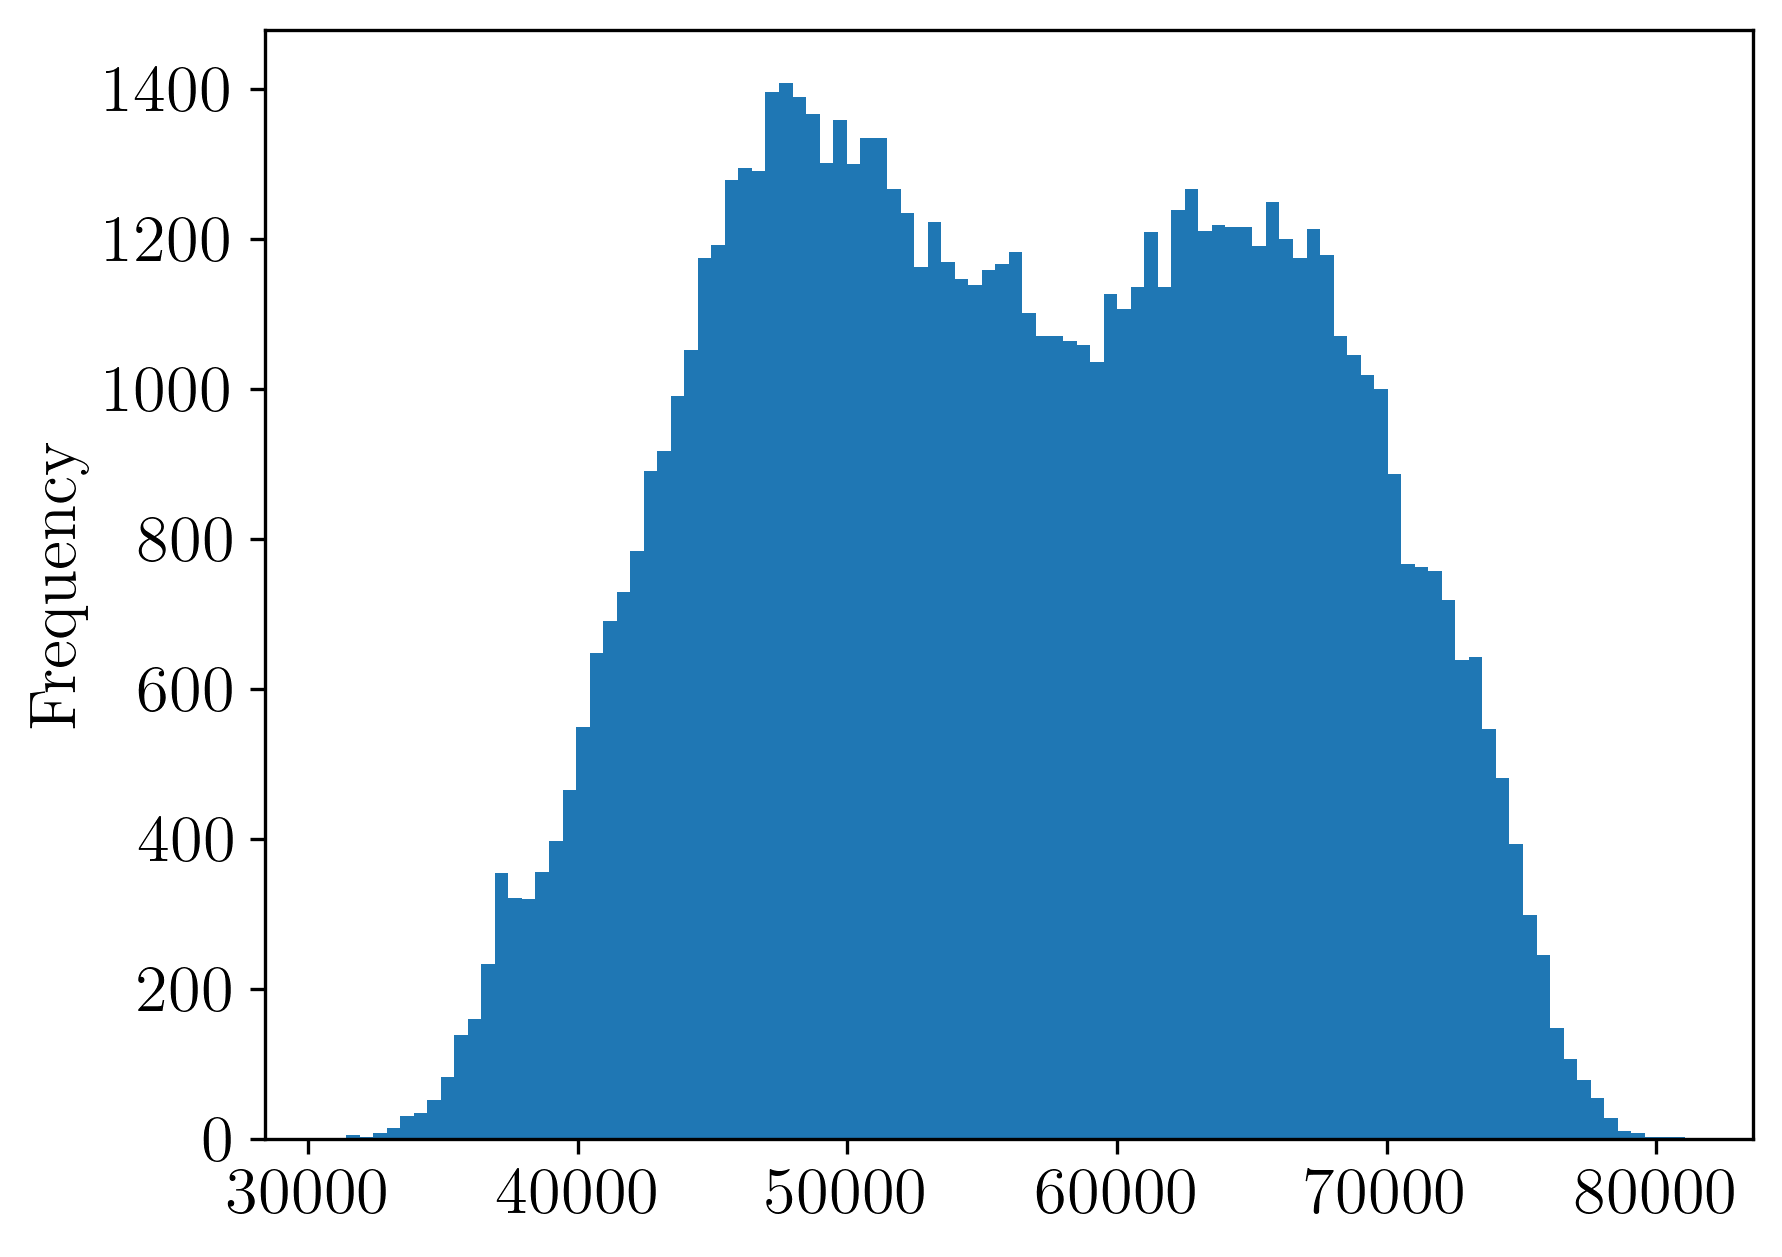

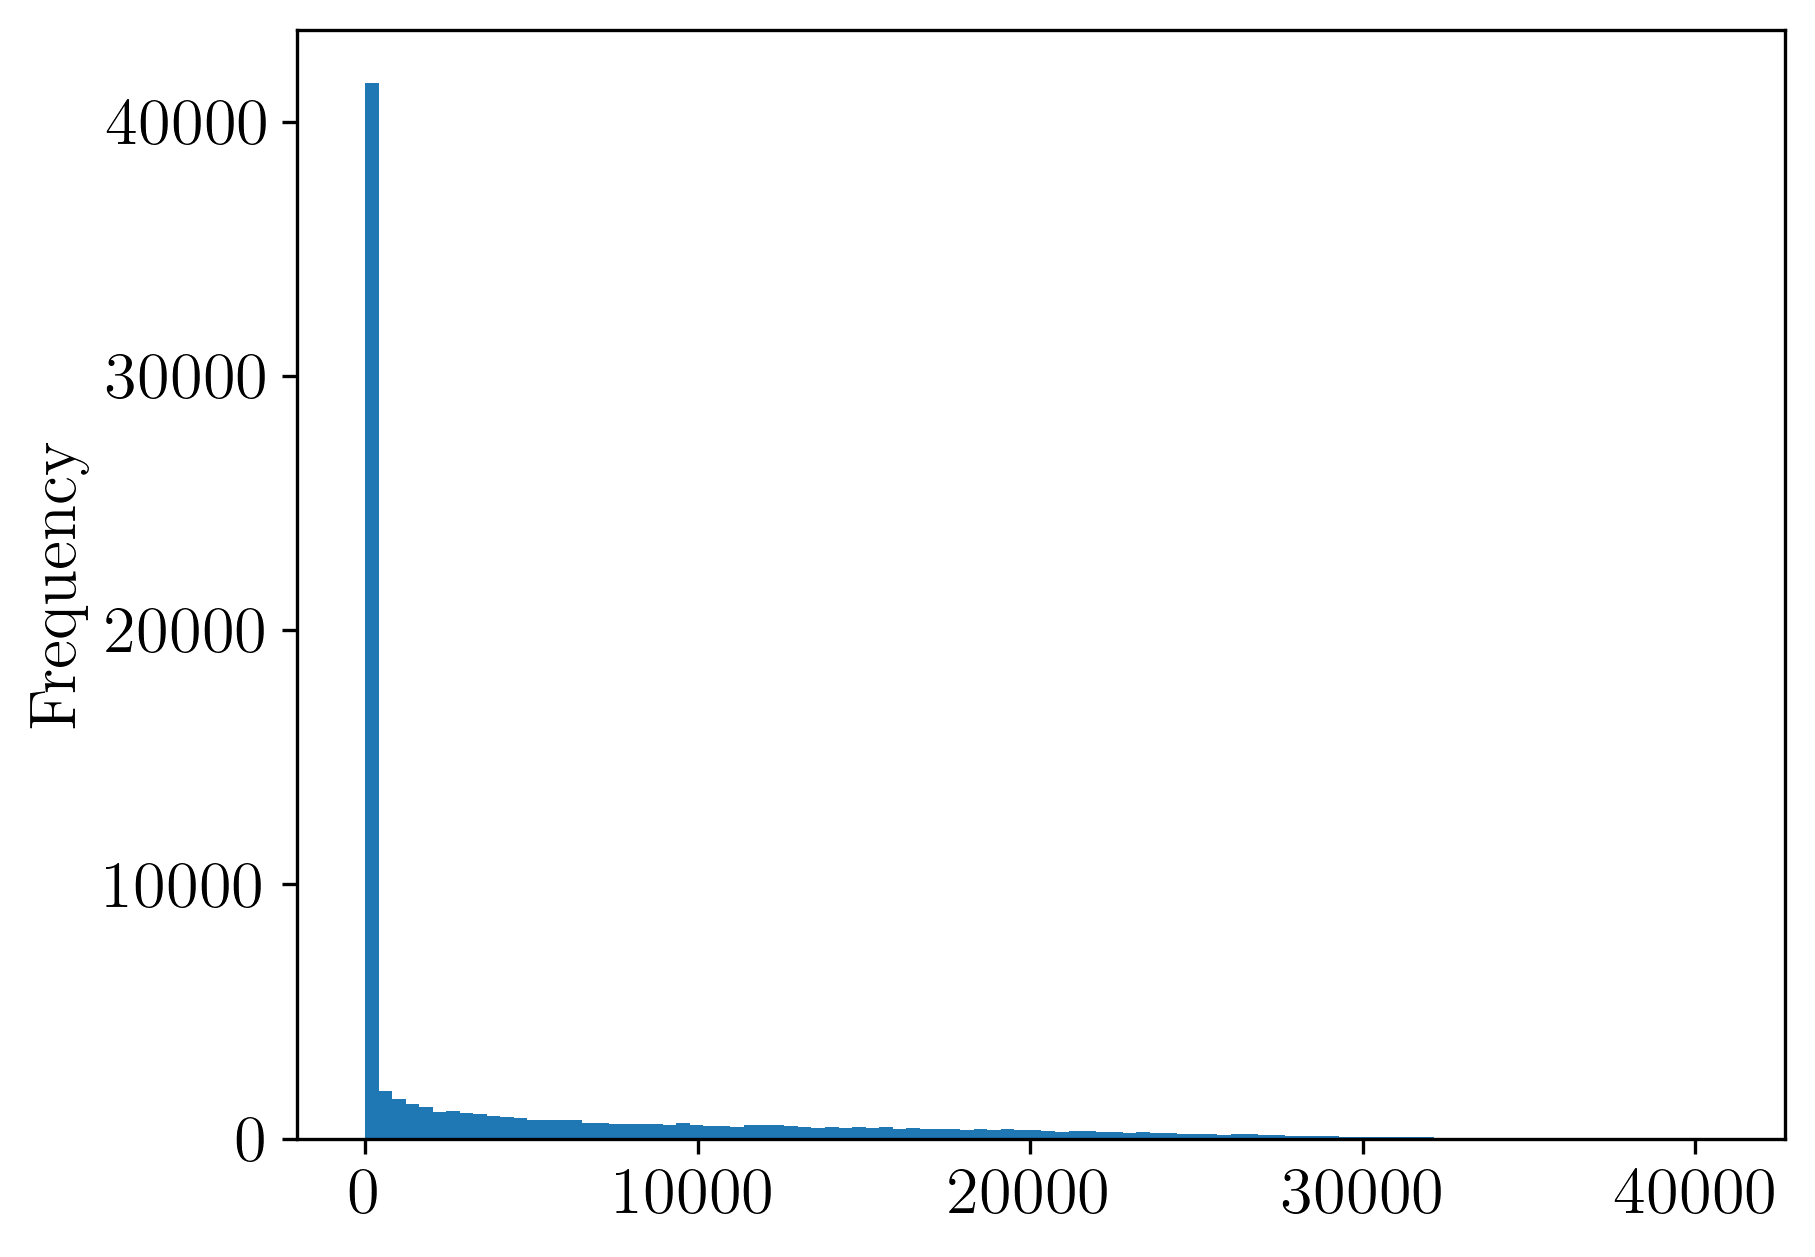

<Axes: ylabel='Frequency'>

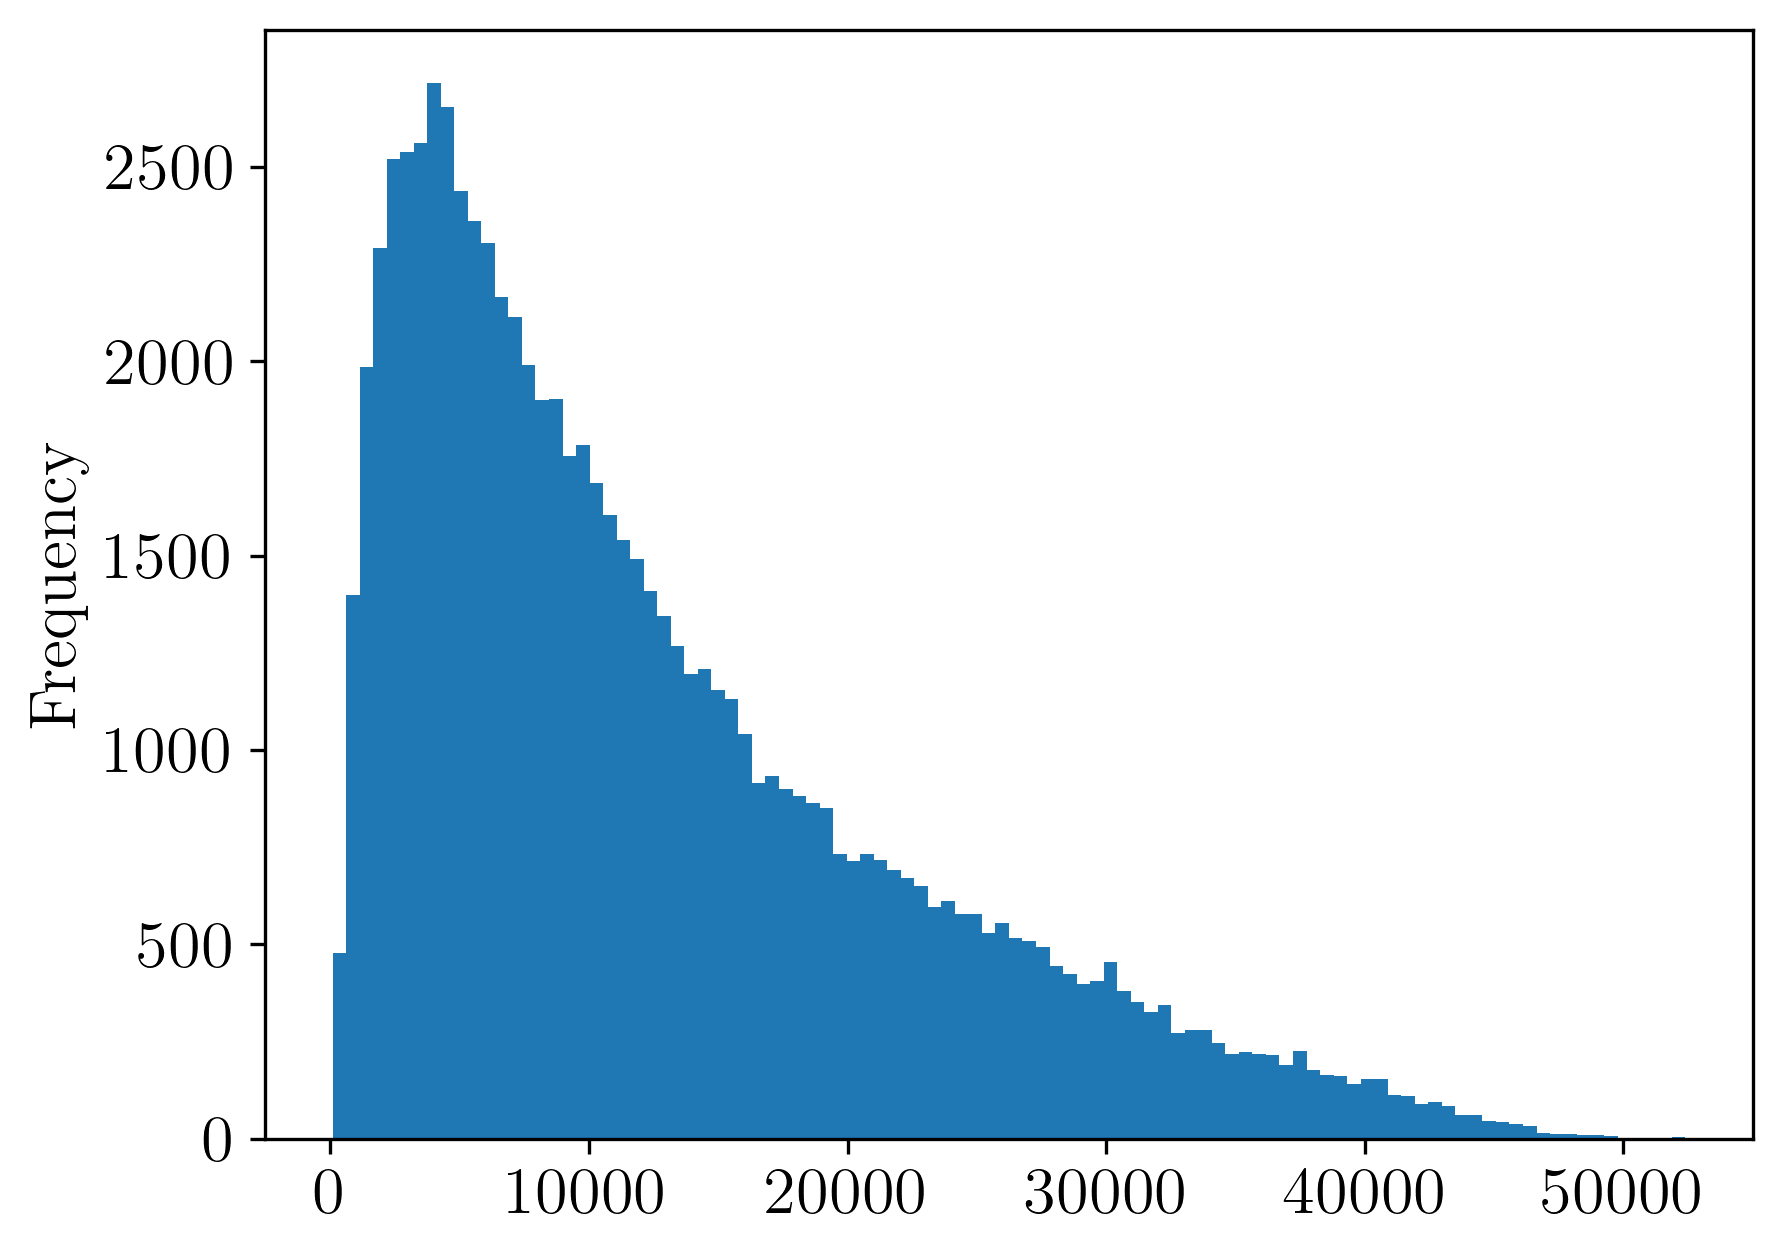

In [70]:
import matplotlib.pyplot as plt

df['load'].plot.hist(bins=100)
plt.show()
df['solar_gen'].plot.hist(bins=100)
plt.show()
df['wind_gen'].plot.hist(bins=100)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       78888 non-null  datetime64[ns, UTC]
 1   load       78888 non-null  float64            
 2   wind_gen   78888 non-null  float64            
 3   solar_gen  78888 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 2.4 MB


In [72]:
df_cropped = df[49000:50000]
df_cropped.head(30)

,date,load,wind_gen,solar_gen
49000,2020-08-03 16:00:00+00:00,57065.25,4174.50,7724.00
49001,2020-08-03 17:00:00+00:00,56857.75,4423.00,4793.75
49002,2020-08-03 18:00:00+00:00,56067.50,4197.50,2187.75
49003,2020-08-03 19:00:00+00:00,54212.00,3678.75,421.25
49004,2020-08-03 20:00:00+00:00,52430.50,3884.00,3.25
49005,2020-08-03 21:00:00+00:00,49200.50,4286.25,0.00
49006,2020-08-03 22:00:00+00:00,44933.25,4304.25,0.00
49007,2020-08-03 23:00:00+00:00,42203.75,4240.00,0.00
49008,2020-08-04 00:00:00+00:00,40838.00,4689.50,0.00
49009,2020-08-04 01:00:00+00:00,39984.00,4953.25,0.00


['load', 'wind_gen', 'solar_gen']


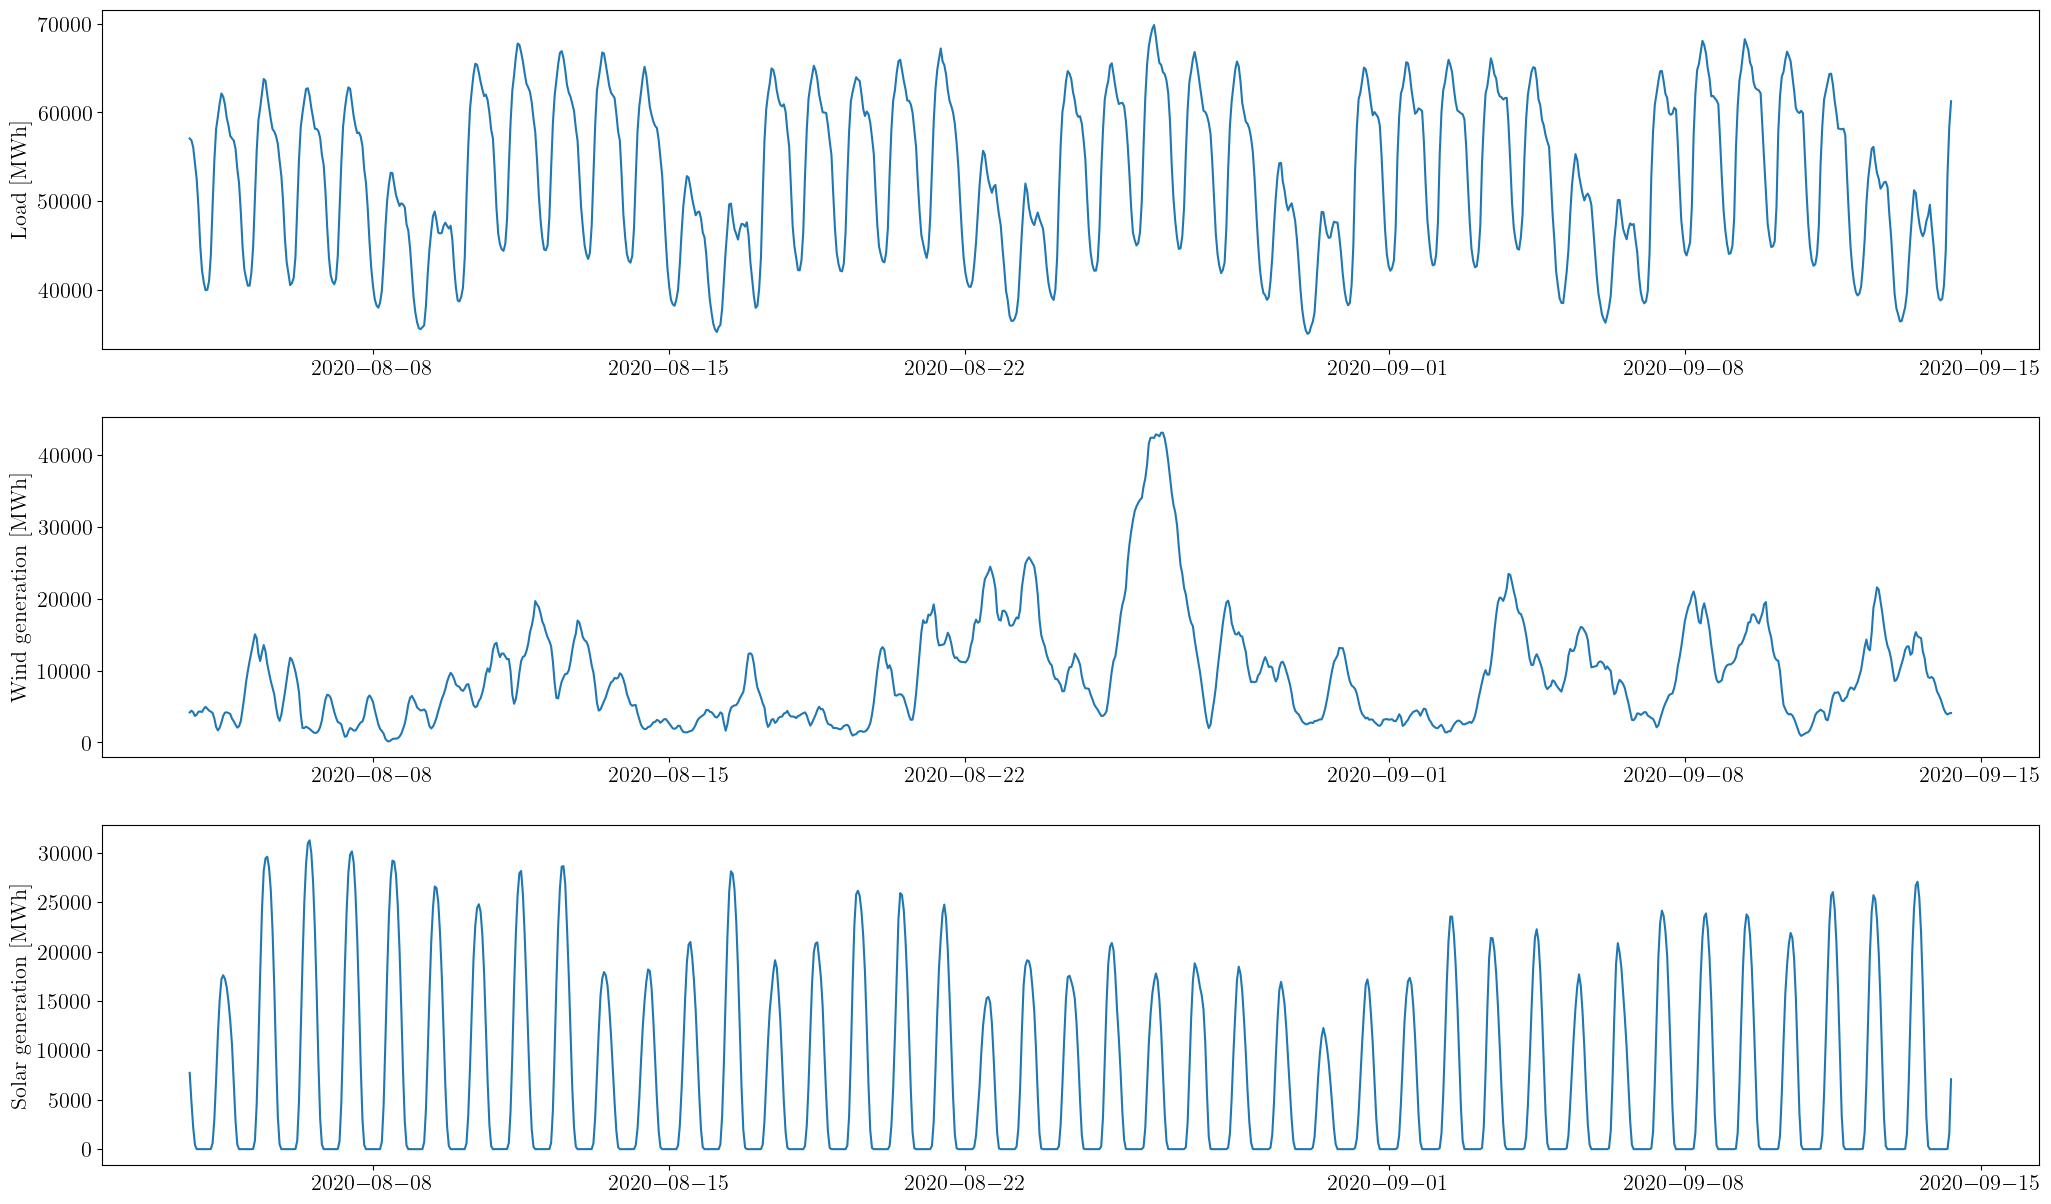

In [73]:
# plot different time series
skip_days = 14
skip_hours = 24*skip_days

keys = list(df.drop(columns="date").columns)
print(keys)
labels = keys
axis_labels = ["Load [MWh]", "Wind generation [MWh]", "Solar generation [MWh]"]

fig, axs = plt.subplots(3,1, figsize=(25,15), dpi=100)

for i, (key, label) in enumerate(zip(keys, labels)):
    axs[i].plot(df_cropped['date'], df_cropped[key], label=label)
    #axs[i].set_xticks(np.array(list(df_cropped['date']))[::skip_hours])
    #axs[i].legend()
    font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

    matplotlib.rc('font', **font)
    #axs[i].set_xlabel("Time")
    axs[i].set_ylabel(axis_labels[i])
#font = {'family' : 'arial',
        #'weight' : 'bold',
        #'size'   : 22}

matplotlib.rc('font', **font)
plt.show()

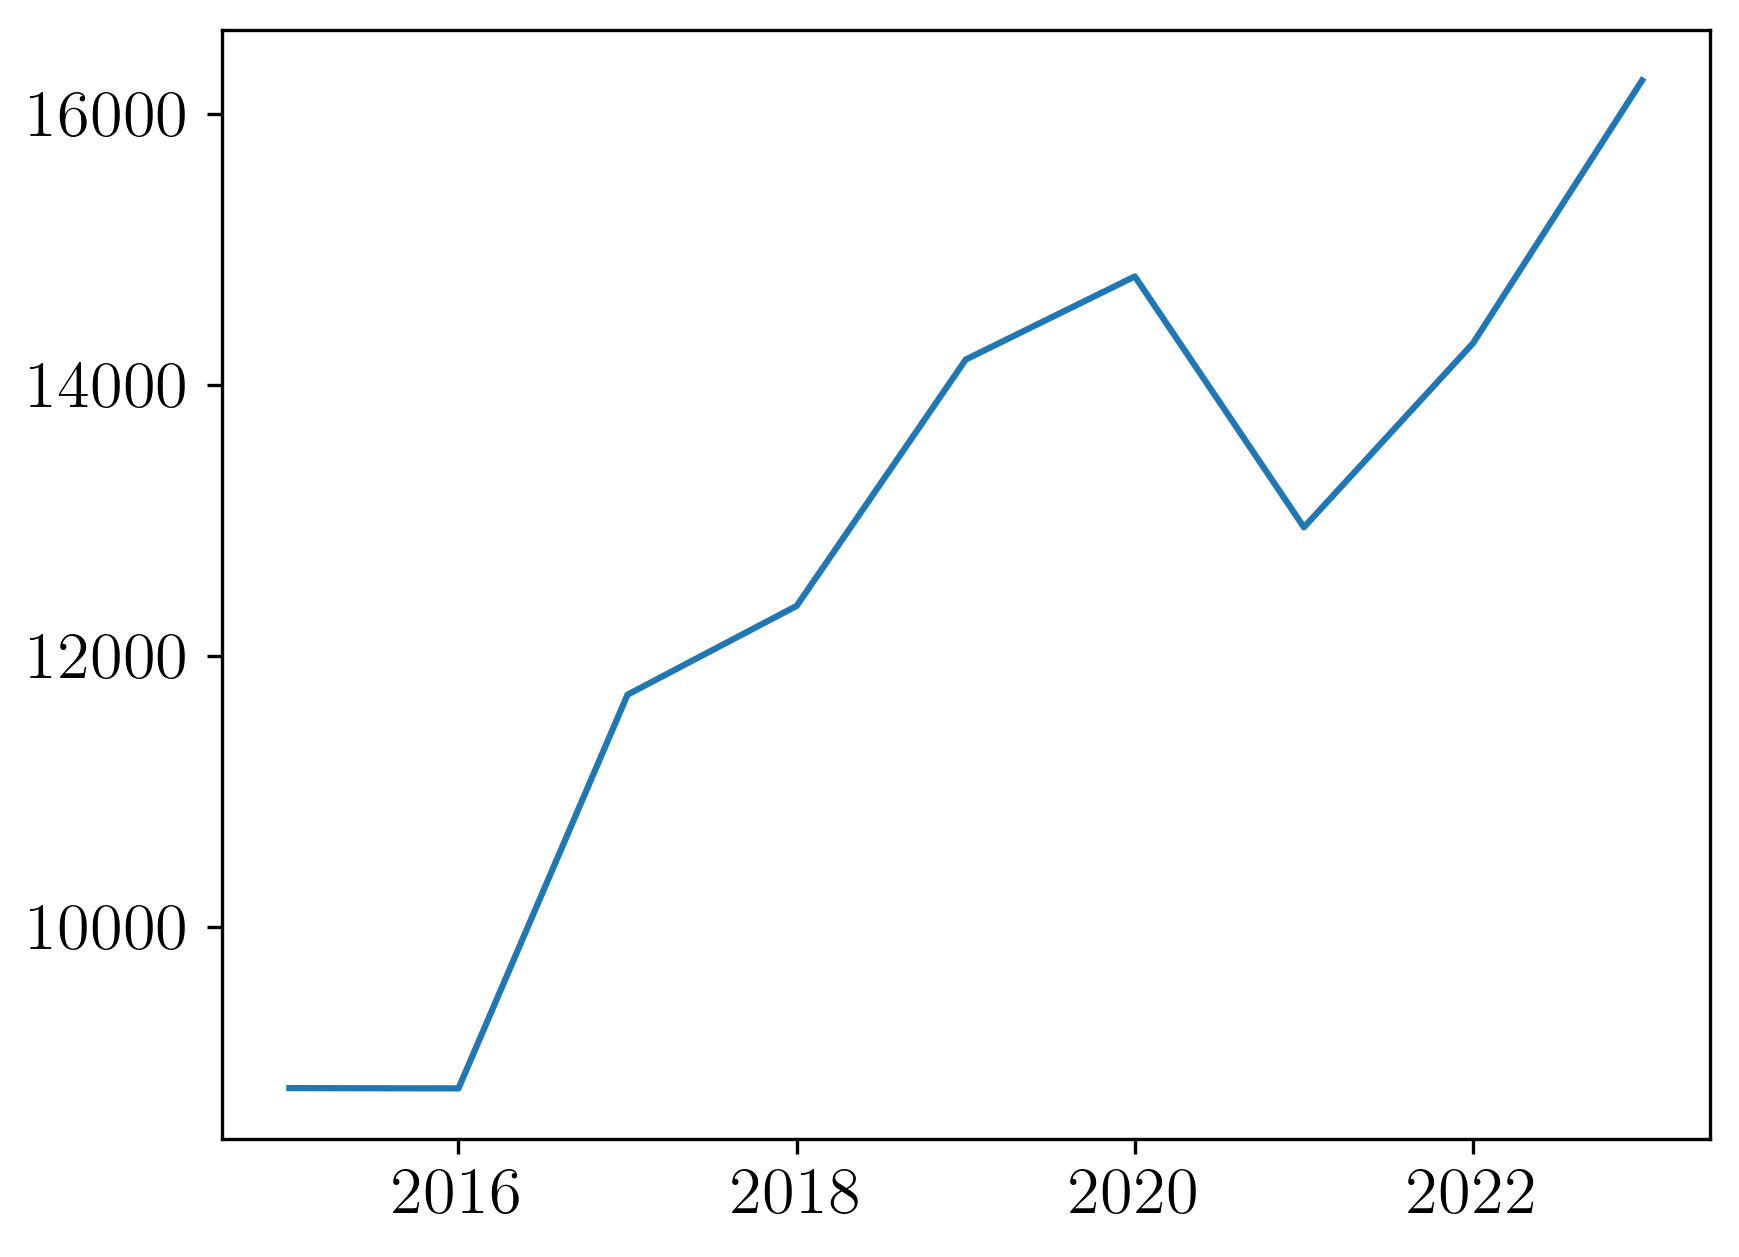

In [74]:
# plot 
means = df["wind_gen"].groupby(df["date"].dt.year).mean()
plt.plot(means)

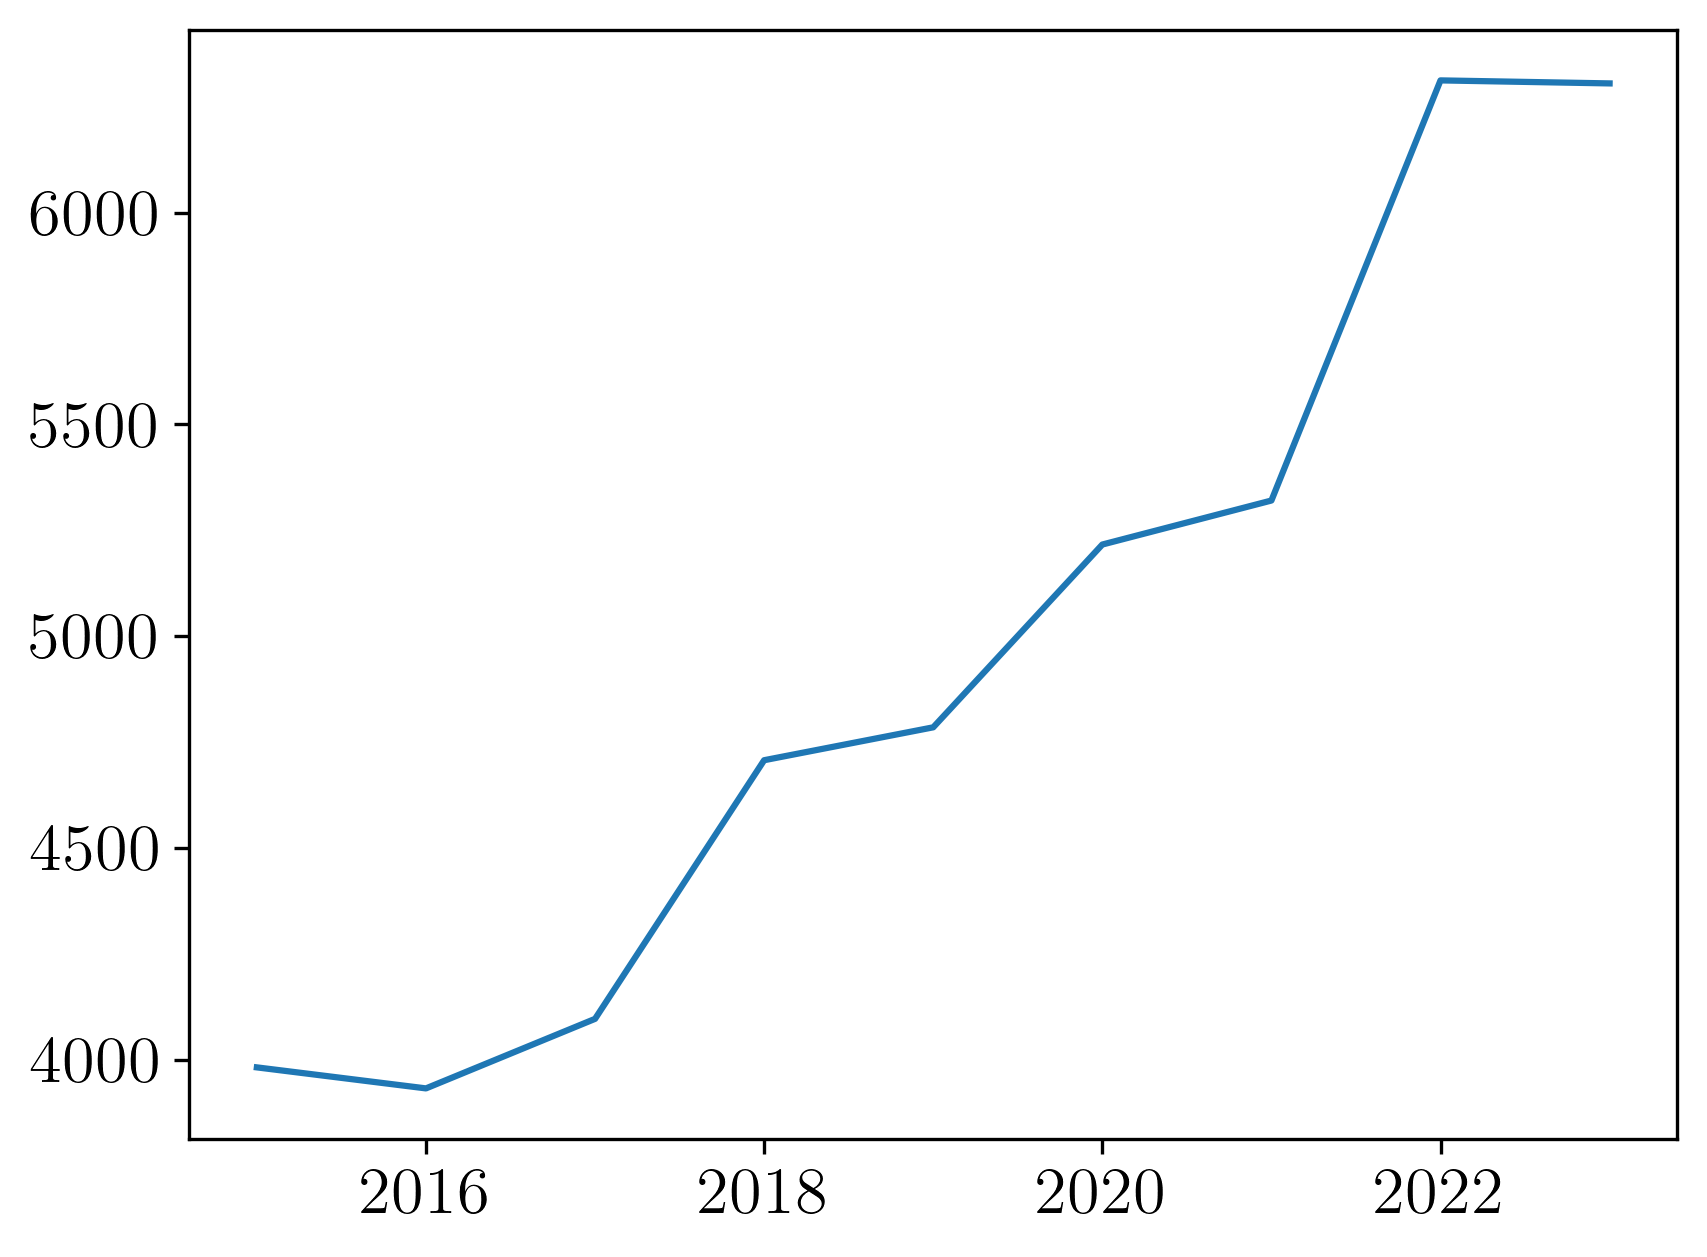

In [75]:
# plot
means = df["solar_gen"].groupby(df["date"].dt.year).mean()
plt.plot(means)

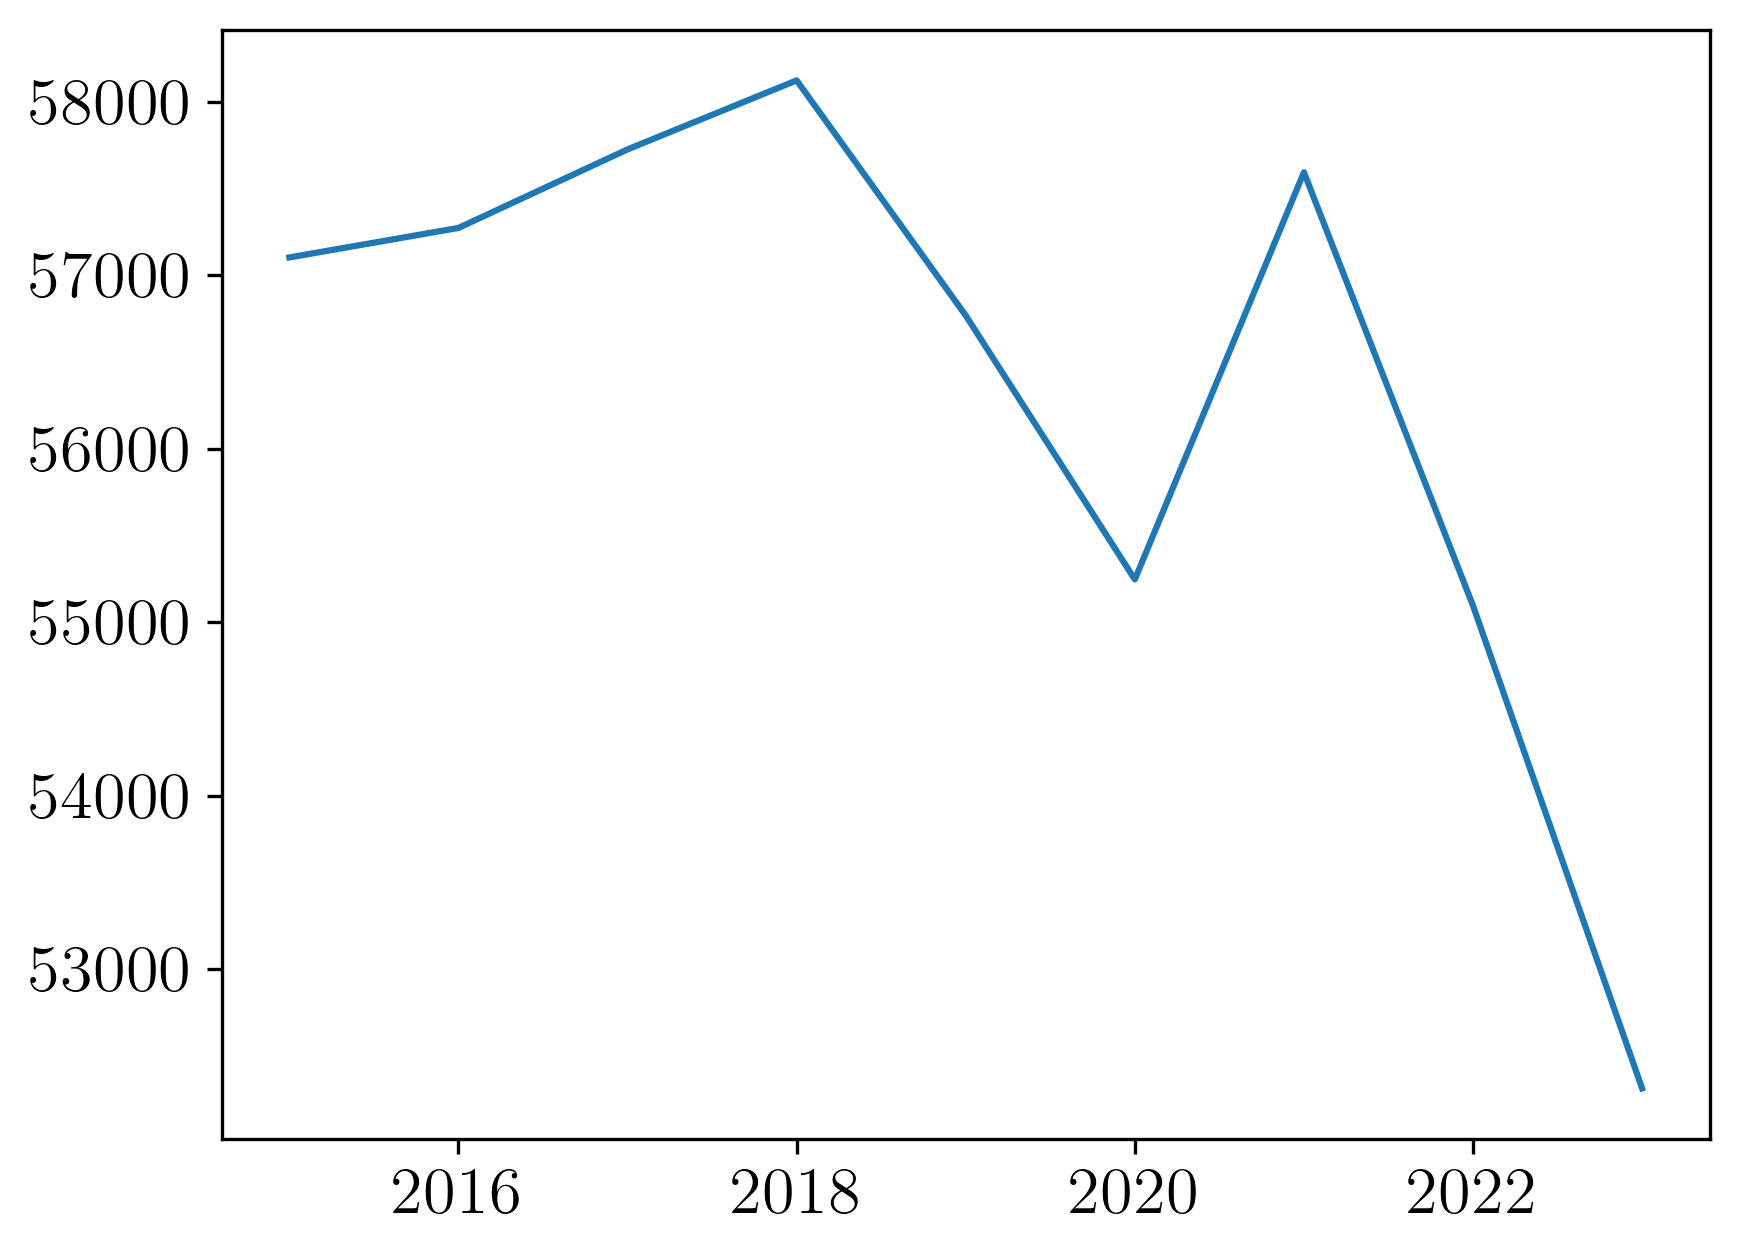

In [76]:
means = df["load"].groupby(df["date"].dt.year).mean()
plt.plot(means)

In [77]:
print(df[['load', 'solar_gen', 'wind_gen']].corr())

# Takeaway: The correlation between all of them is very low. Even the correlation between solar and load (0.26) is there because of the common correlation with the time of the day.

               load  solar_gen  wind_gen
load       1.000000   0.257737  0.107941
solar_gen  0.257737   1.000000 -0.186642
wind_gen   0.107941  -0.186642  1.000000


In [78]:
#from statsmodels.tsa.stattools import adfuller, acf, pacf
#adf_result_load = adfuller(df["load"].values)
#print(adf_result_load)
#print(f"ADF Statistic: {adf_result_load[0]}")
#print(f"p-value: {adf_result_load[1]}")
#
#from statsmodels.tsa.stattools import adfuller, acf, pacf
#adf_result_load = adfuller(df["solar_gen"].values)
#print(adf_result_load)
#print(f"ADF Statistic: {adf_result_load[0]}")
#print(f"p-value: {adf_result_load[1]}")
#
#from statsmodels.tsa.stattools import adfuller, acf, pacf
#adf_result_load = adfuller(df["wind_gen"].values)
#print(adf_result_load)
#print(f"ADF Statistic: {adf_result_load[0]}")
#print(f"p-value: {adf_result_load[1]}")

# Result: I am surprised that values are so low and we can reject the null. (also maybe because data set is so large?)
# How can this happen, given that there is a clear trend and seasonality?
# Answer: ADF only checks for stochastic trend. If there is a deterministic trend or seasonality, it will not be detected.

(39445,)
(39445,)
(39445,)


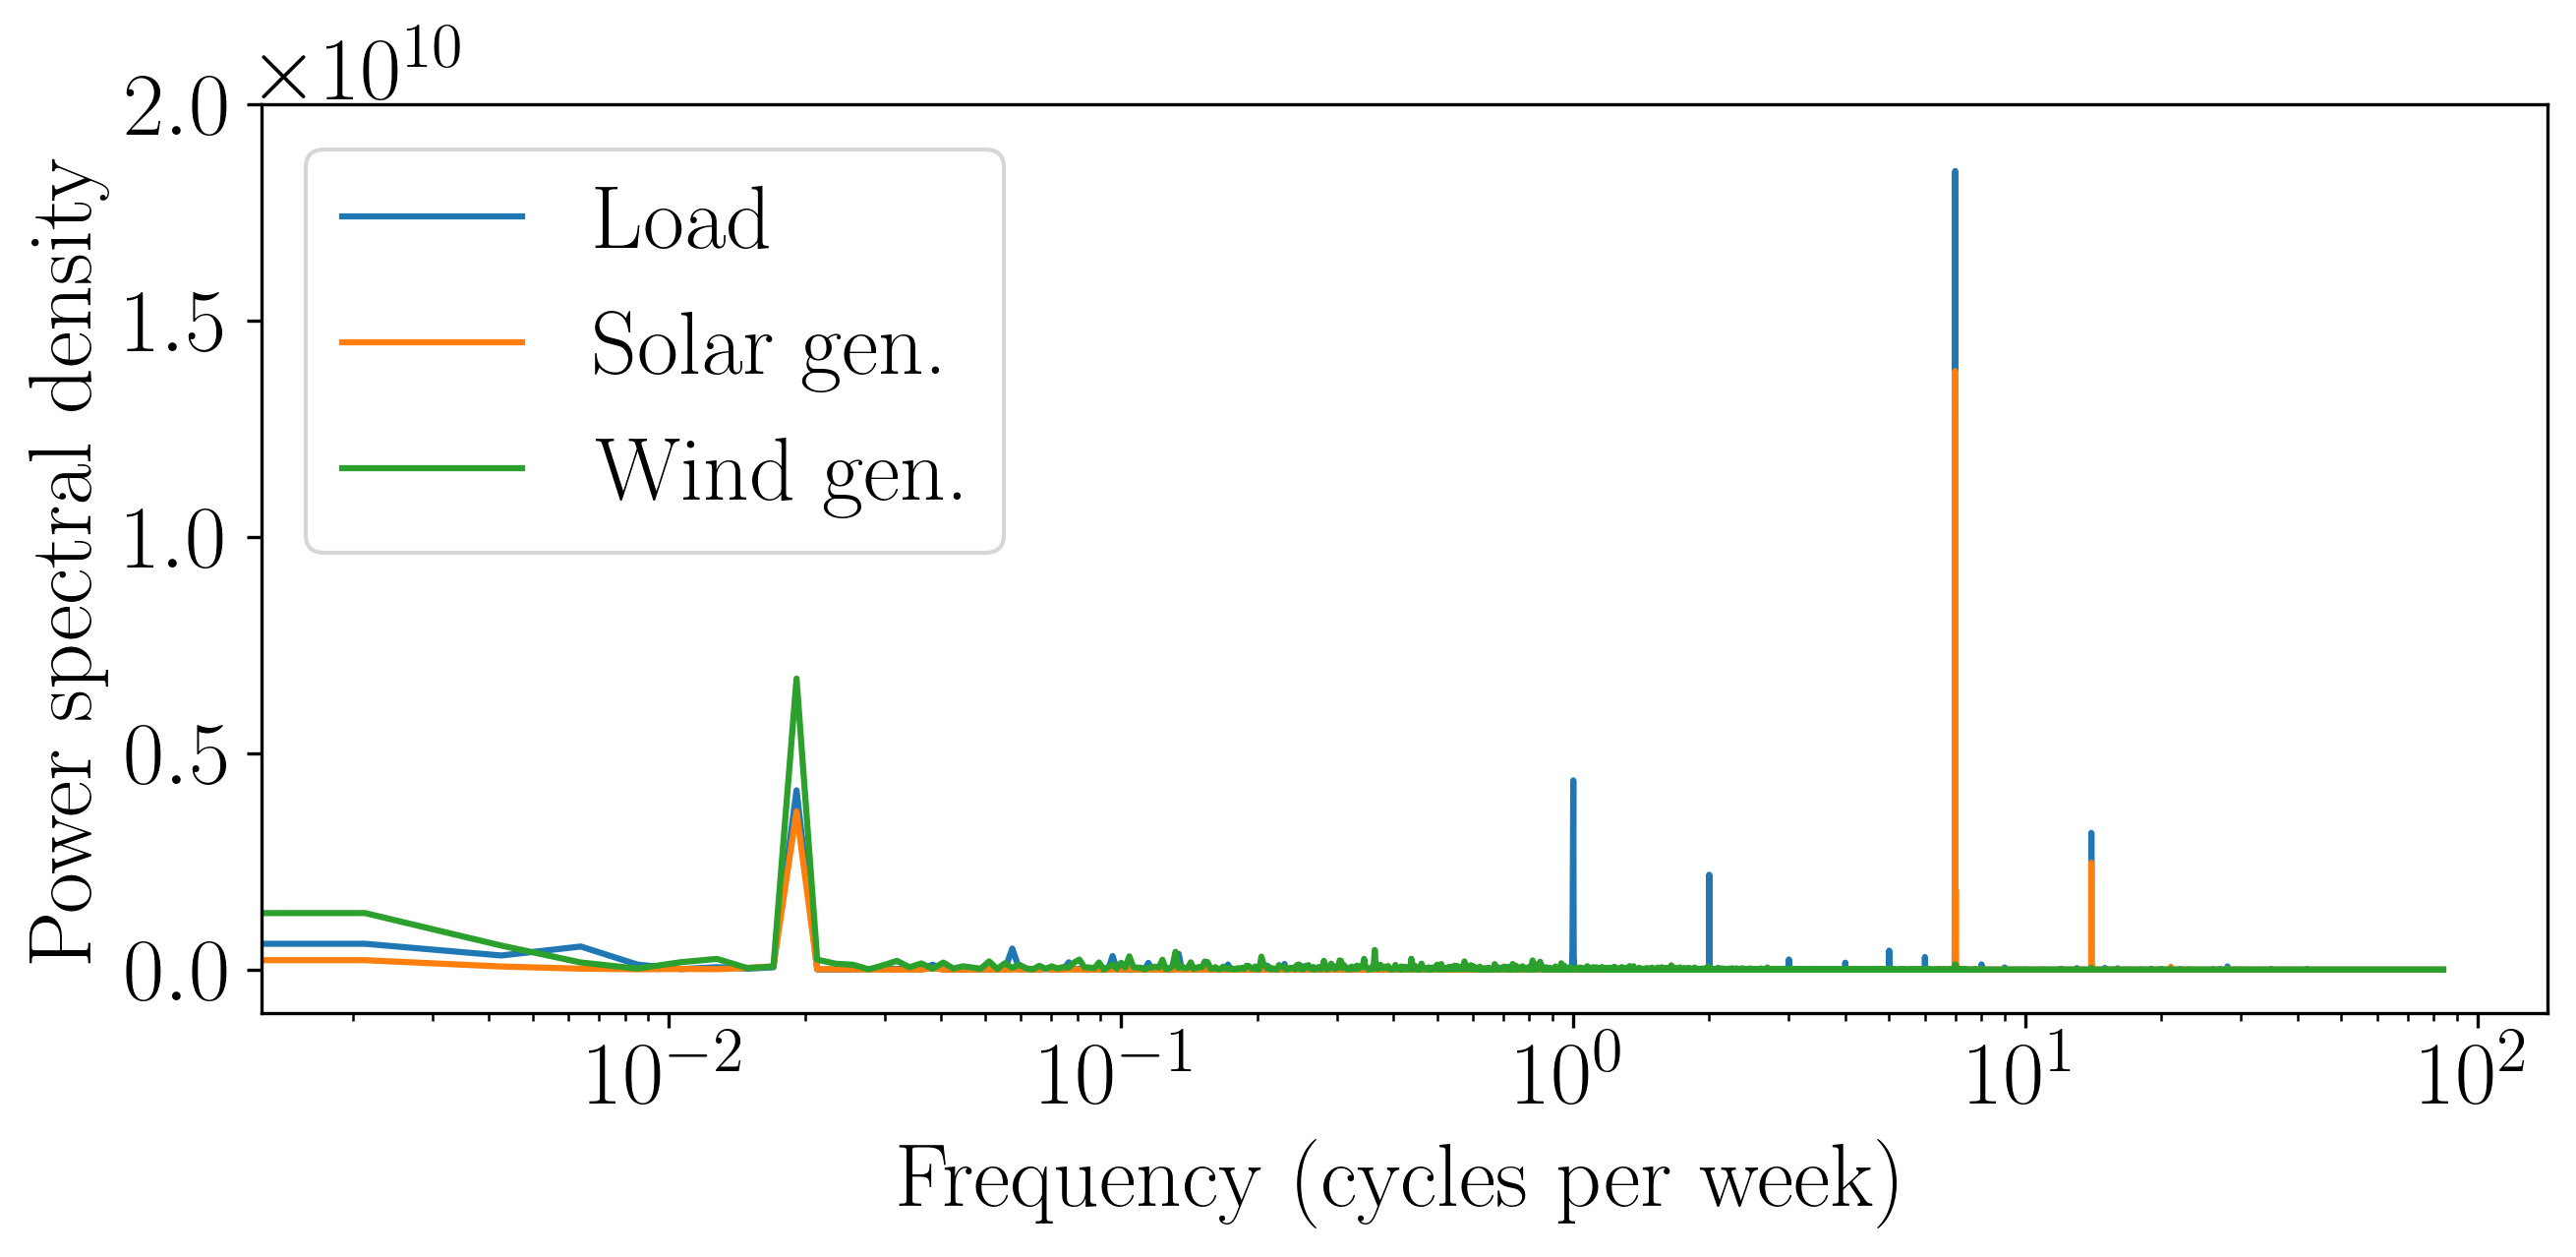

In [81]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams.update({'font.size': 22})

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
# Assuming df["load"].values is your time series data

for i, column in enumerate(["load", "solar_gen", "wind_gen"]):

    data = df[column].values
    headers = {"load": "Load", "solar_gen": "Solar gen.", "wind_gen": "Wind gen."}

    # Sampling frequency (fs) is 1 hour^-1 since the data is hourly
    fs = 24*7

    # Calculate the periodogram (frequencies and power spectral density)
    frequencies, psd = periodogram(data, fs=fs)
    print(frequencies.shape)
    # Plotting the periodogram
    
    #plt.plot(frequencies[:10000], psd[:10000])
    ax.plot(frequencies, psd, label=headers[column], alpha=1)
    
    
    ax.set_ylabel('{}'.format(headers[column]))
    
    ax.set_xscale('log')
    ax.set_ylim(-0.1e10,2e10)

ax.legend()
ax.set_xlabel('Frequency (cycles per week)')
ax.set_ylabel('Power spectral density')
plt.show()

# One can clearly see the 
# (1) yearly pattern at ~0.02 cycles per week
# (2) weekly pattern at 1 cycles per week
# (3) daily pattern at 7 cycles per week
# (4) half-daily pattern at 14 cycles per week

# load has (1) to (4) and a weird pattern at twice a week
# solar_gen has (1), (3) and (4)
# wind_gen only has (1)


KeyboardInterrupt: 

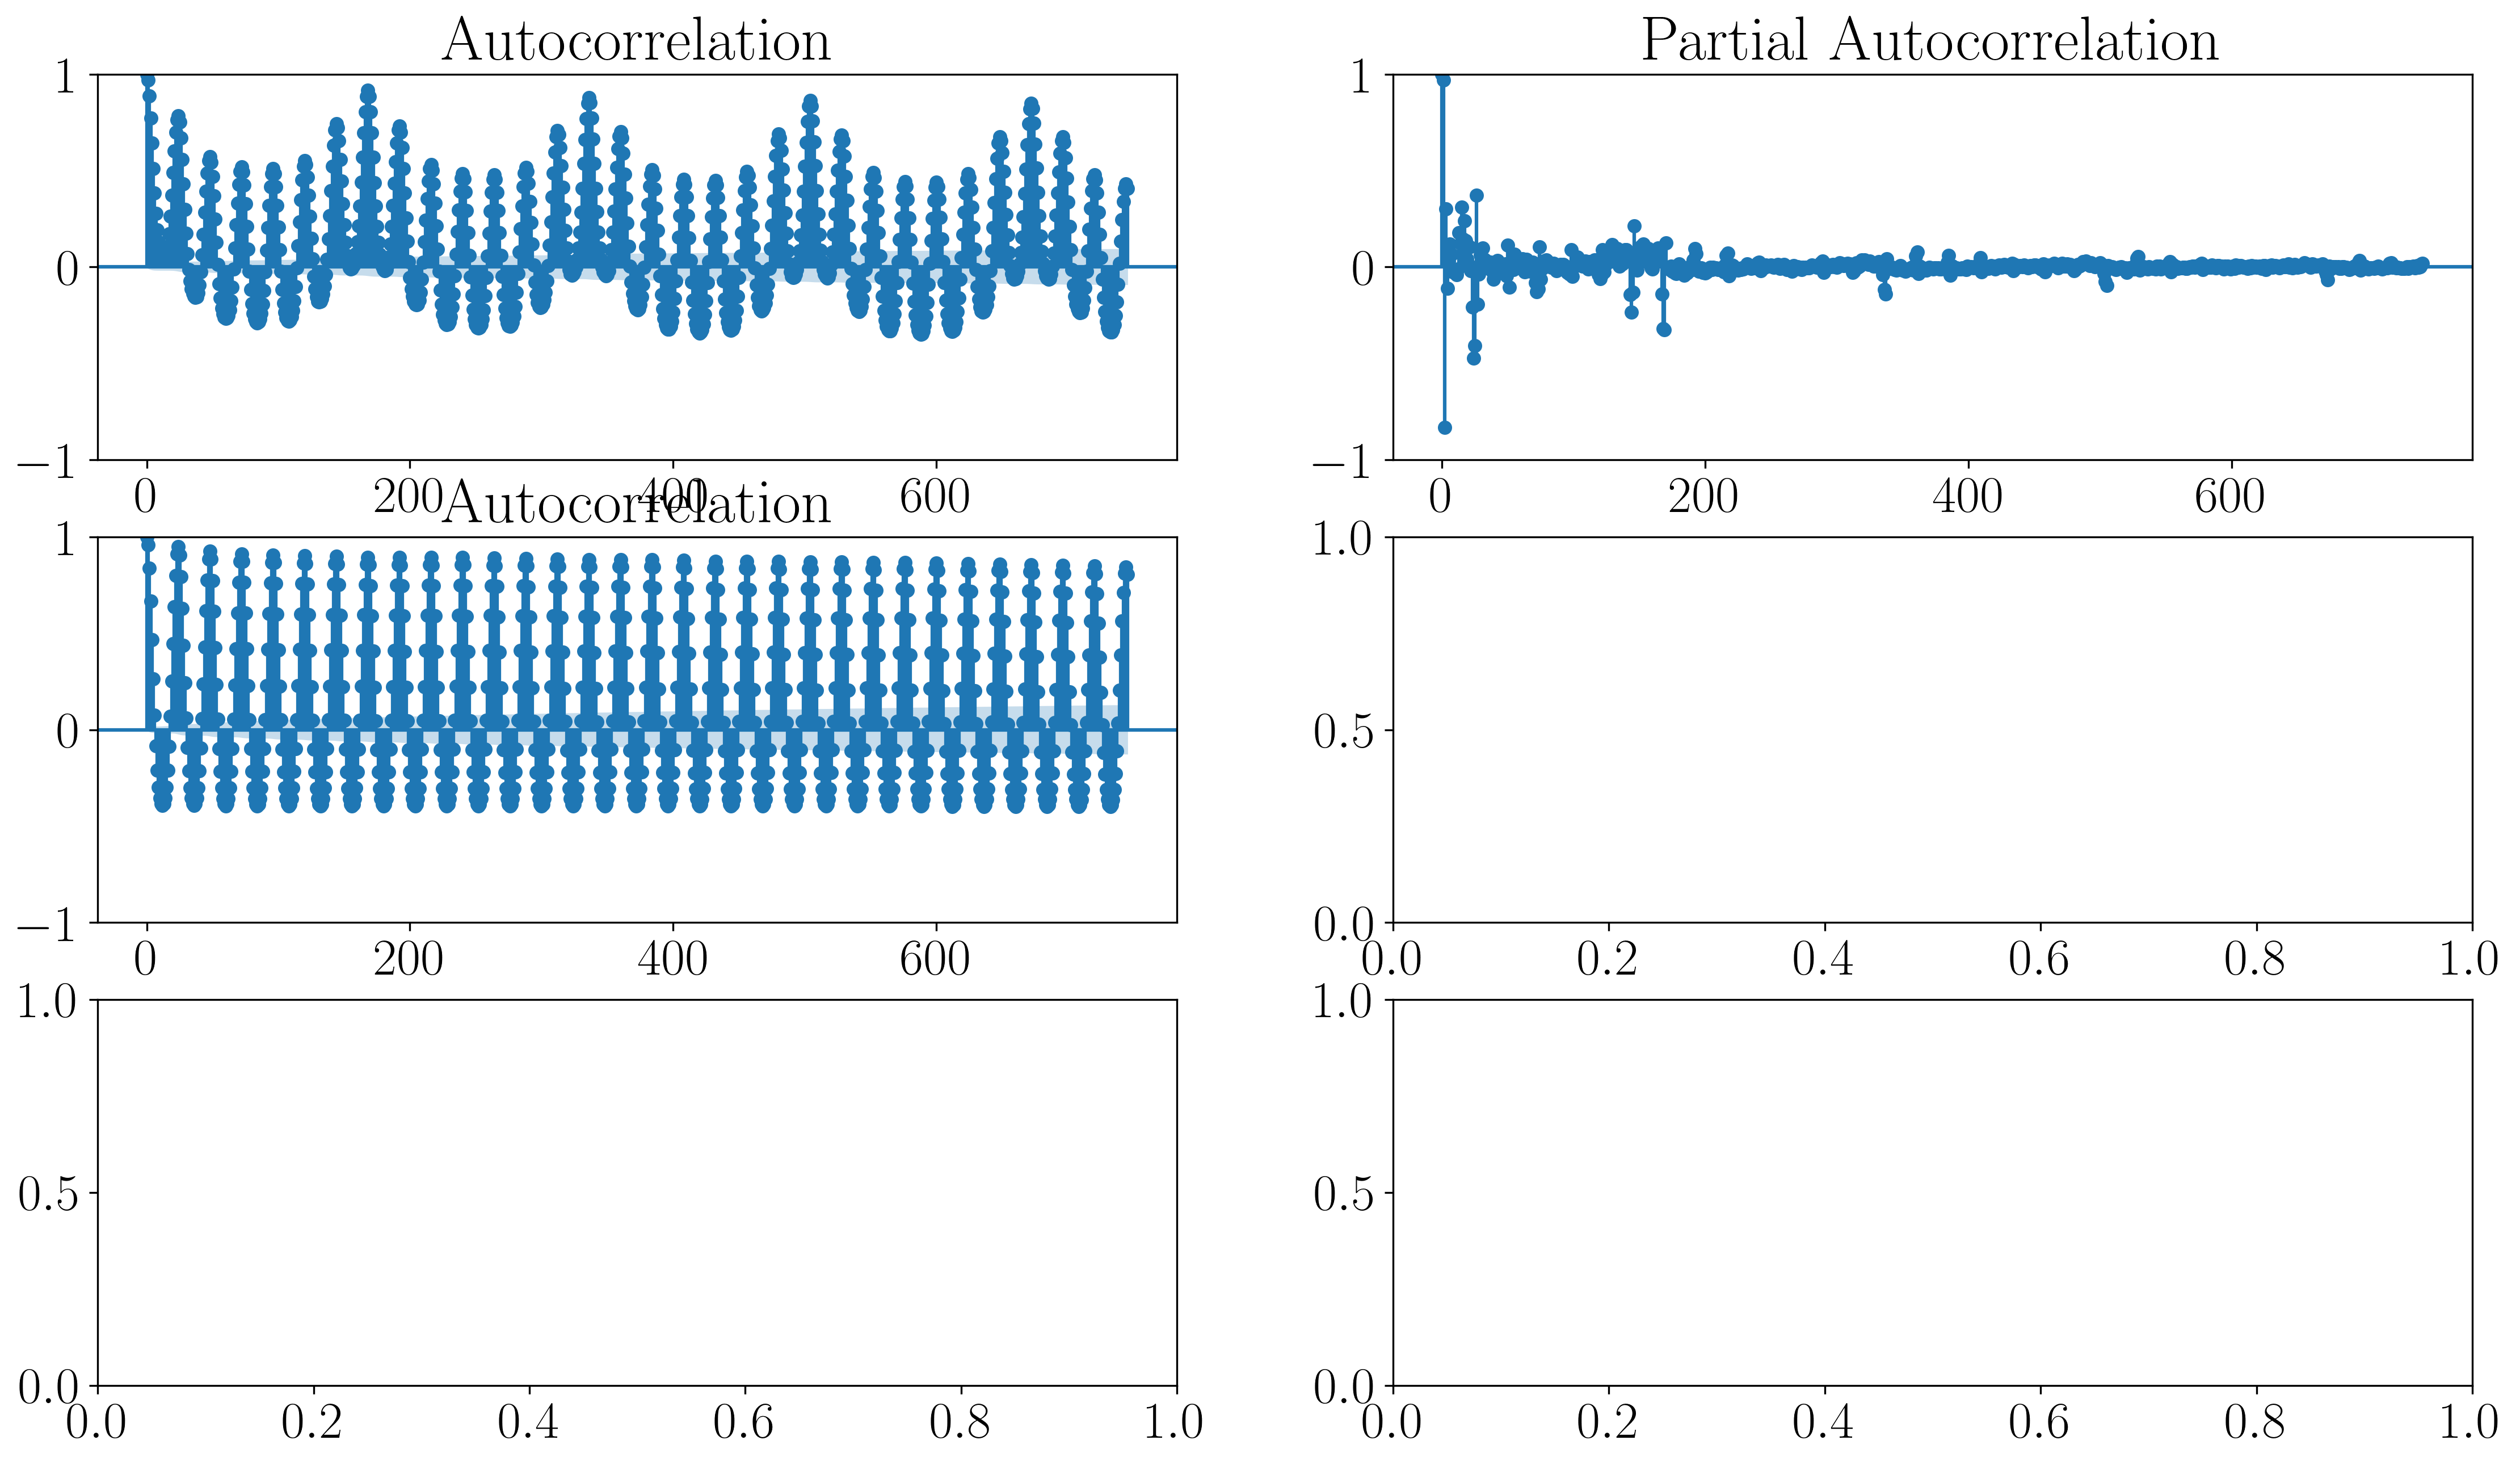

In [80]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3, 2, figsize=(18, 10))
# Assuming df["load"].values is your time series data

for i, column in enumerate(["load", "solar_gen", "wind_gen"]):
    data = df[column].values

        # Plot ACF and PACF
    plot_acf(data, lags=24*31+1, ax=ax[i][0])  # You can adjust the number of lags as needed
    plot_pacf(data, lags=24*31+1, method='ywm', ax=ax[i][1])  # Using 'ywm' for a more robust PACF calculation
plt.show()

# Takeaway:
# load: Strong PA of longer lags, periodicity
# solar_gen: Medium PA of longer lags, periodicity
# wind_gen: Slight PA of longer lags (daily), no periodicity

# This means that the linear predictability for load > solar_gen > wind_gen


In [ ]:
import numpy as np
import pandas as pd
from math import factorial, log

def permutation_entropy(time_series, m, tau):
    """Calculate the Permutation Entropy of a given time series.
    
    Parameters:
        time_series (array-like): The time series data.
        m (int): Order of permutations (embedding dimension).
        tau (int): Time delay.

    Returns:
        float: The permutation entropy.
    """
    n = len(time_series)
    permutations = {}
    factorial_m = factorial(m)
    
    # Generate all possible permutations of order m
    for i in range(n - tau * (m - 1)):
        # Extract the time-ordered pattern of length m
        sorted_index_array = np.argsort(time_series[i:i + tau * m:tau])
        pattern = tuple(sorted_index_array)
        
        if pattern in permutations:
            permutations[pattern] += 1
        else:
            permutations[pattern] = 1
    
    # Calculate the probability of each pattern
    probabilities = np.array(list(permutations.values())) / (n - tau * (m - 1))
    
    # Calculate the permutation entropy
    pe = -np.sum(probabilities * np.log(probabilities))
    return pe / log(factorial_m)

# Example usage:
# Assuming df["load"], df["solar_gen"], and df["wind_gen"] are your time series data.
# Parameters m and tau can be adjusted based on the specific characteristics of the time series.
m = 5 # Embedding dimension
tau = 1  # Time delay

load_pe = permutation_entropy(df["load"].values, m, tau)
solar_gen_pe = permutation_entropy(df["solar_gen"].values, m, tau)
wind_gen_pe = permutation_entropy(df["wind_gen"].values, m, tau)

print("Permutation Entropy of Load:", load_pe)
print("Permutation Entropy of Solar Generation:", solar_gen_pe)
print("Permutation Entropy of Wind Generation:", wind_gen_pe)

# Takeway:
# Perm Entropy is wind > load > solar for all m < 10, tau=1
# Solar is by far the lowest
# Line search for m=5 and tau=1...6 shows similar results


Permutation Entropy of Load: 0.5458439972522978
Permutation Entropy of Solar Generation: 0.329580090319037
Permutation Entropy of Wind Generation: 0.6079666559472129


In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
from math import log

def svd_entropy(time_series, m, tau):
    """Calculate the SVD Entropy of a given time series.

    Parameters:
        time_series (array-like): The time series data.
        m (int): Embedding dimension.
        tau (int): Time delay.

    Returns:
        float: The SVD entropy.
    """
    # Embed the time series into a matrix
    n = len(time_series)
    if n < (m - 1) * tau + 1:
        raise ValueError("Time series is too short for the given m and tau values.")
    
    mat = np.empty((m, n - (m - 1) * tau))
    for i in range(m):
        mat[i] = time_series[i * tau:n - (m - i - 1) * tau]

    # Compute the singular values using SVD
    U, singular_values, V = svd(mat, full_matrices=False)

    # Normalize the singular values to form a probability distribution
    norm_singular_values = singular_values / np.sum(singular_values)
    
    # Compute the entropy
    entropy = -np.sum(norm_singular_values * np.log(norm_singular_values))
    return entropy

# Example usage
m = 100  # Embedding dimension
tau = 1  # Time delay

load_svd_entropy = svd_entropy(df["load"].values, m, tau)
solar_gen_svd_entropy = svd_entropy(df["solar_gen"].values, m, tau)
wind_gen_svd_entropy = svd_entropy(df["wind_gen"].values, m, tau)

print("SVD Entropy of Load:", load_svd_entropy)
print("SVD Entropy of Solar Generation:", solar_gen_svd_entropy)
print("SVD Entropy of Wind Generation:", wind_gen_svd_entropy)


SVD Entropy of Load: 1.8728741322872857
SVD Entropy of Solar Generation: 2.905209085522905
SVD Entropy of Wind Generation: 2.655766242365638


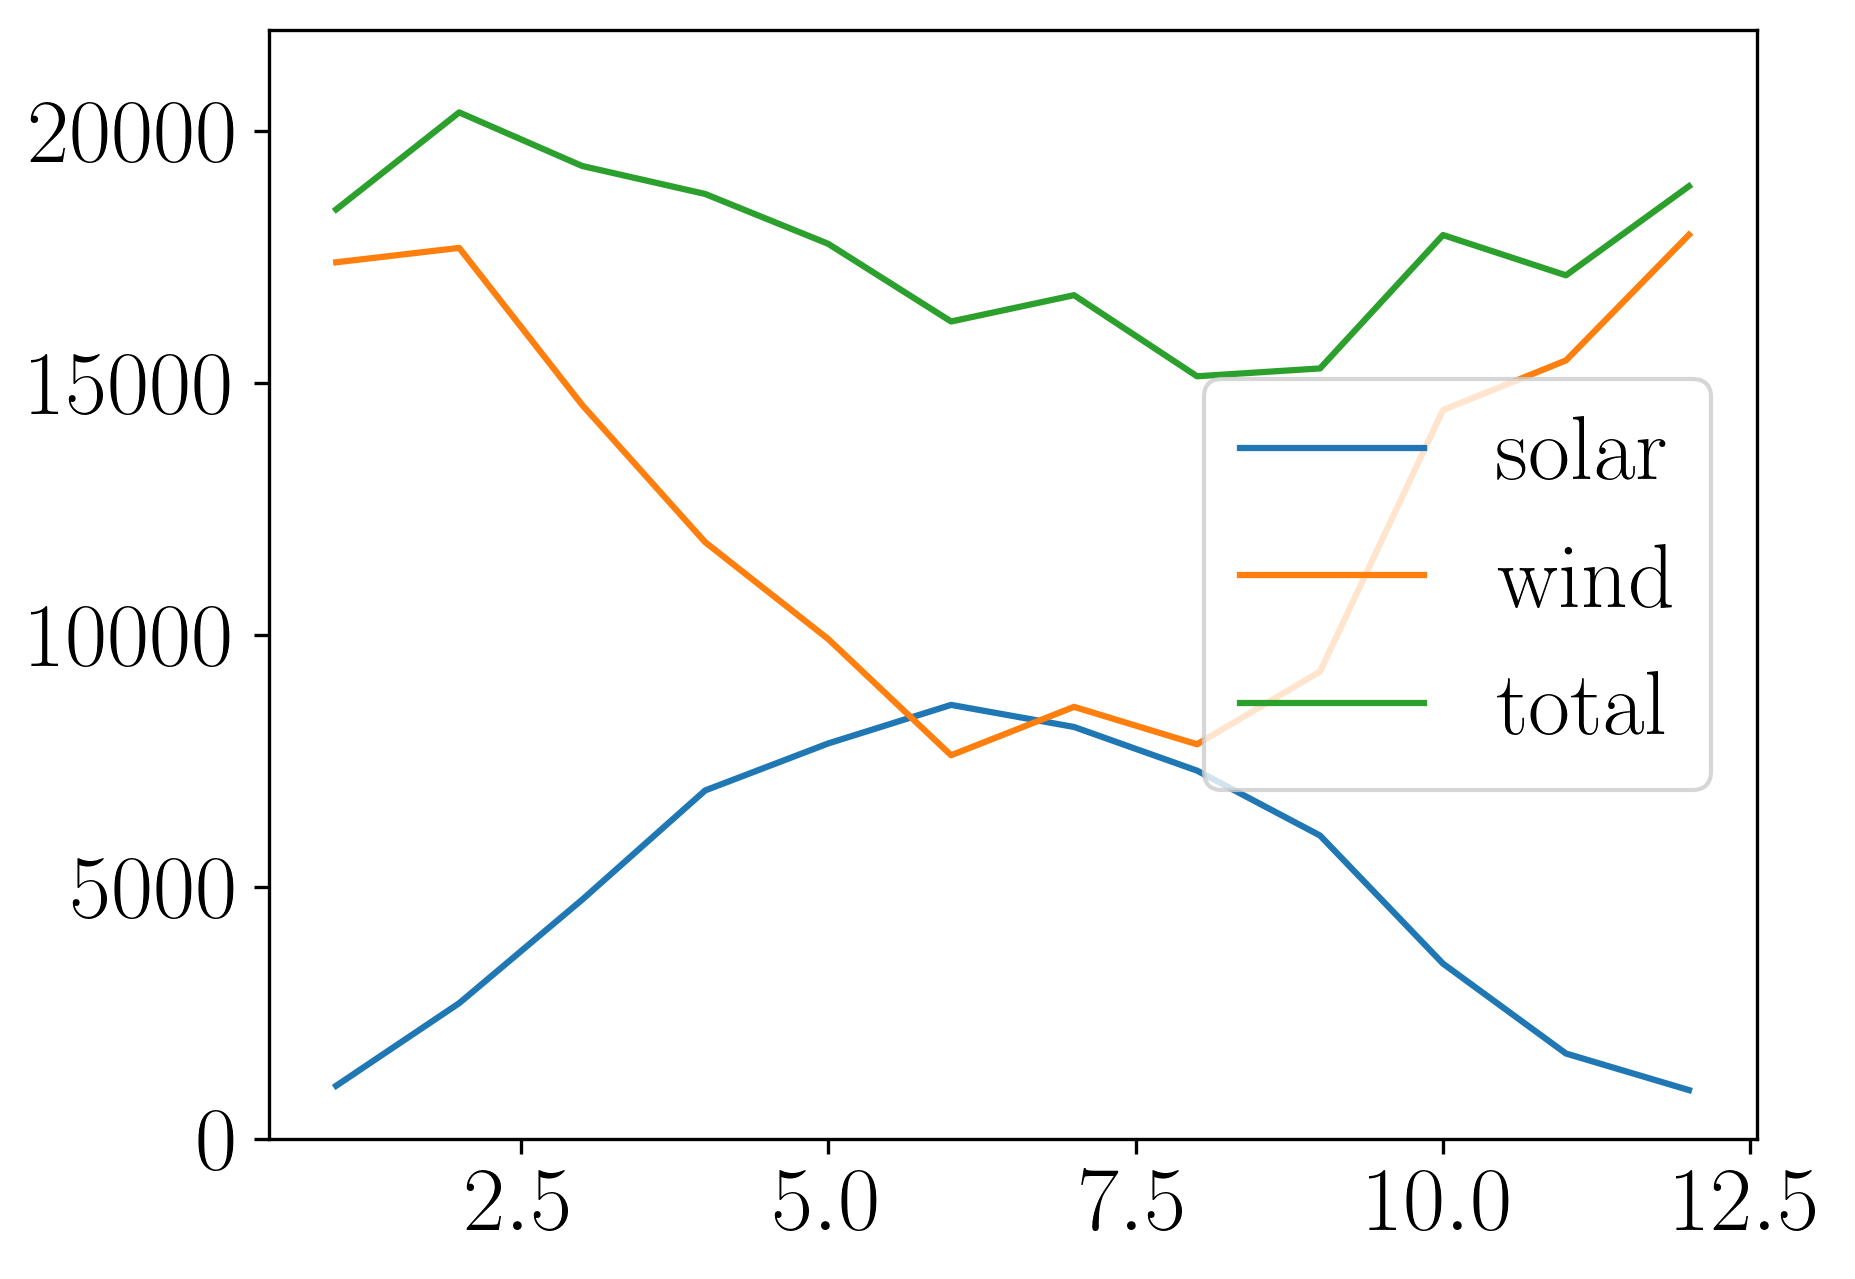

In [ ]:
# plot
means_solar = df["solar_gen"].groupby(df["date"].dt.month).mean()
means_wind = df["wind_gen"].groupby(df["date"].dt.month).mean()

plt.plot(means_solar, label="solar")
plt.plot(means_wind, label="wind")
plt.plot(means_solar+means_wind, label="total")
plt.ylim(0, 22000)
plt.legend()

# Dunkelflaute in autumn (less sun but not yet a lot of wind)

(0.0, 65000.0)

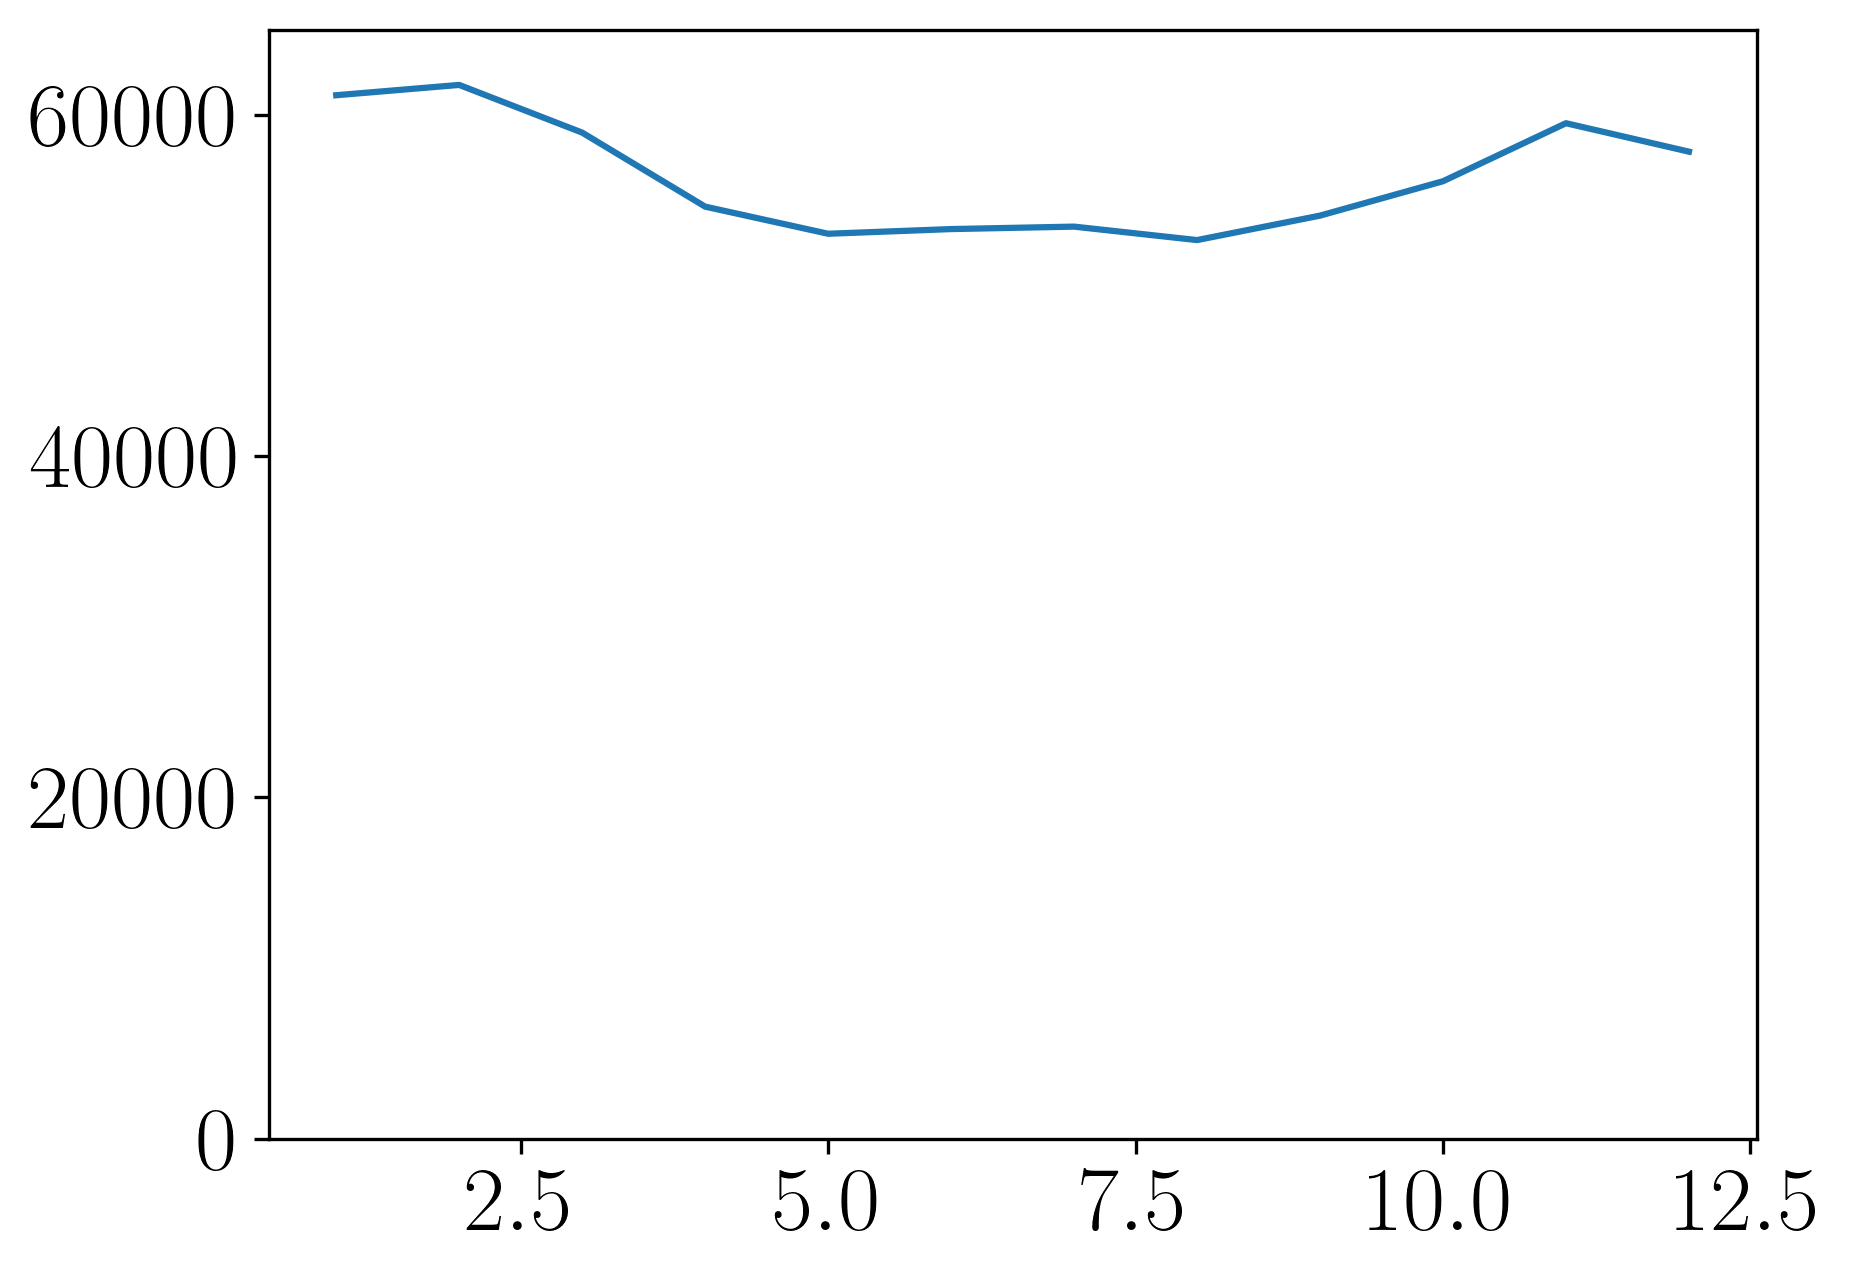

In [ ]:
means_load = df["load"].groupby(df["date"].dt.month).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

In [ ]:
#means = df["hydro_storage_gen"].groupby(df["date"].dt.month).mean()
#plt.plot(means)

(0.0, 65000.0)

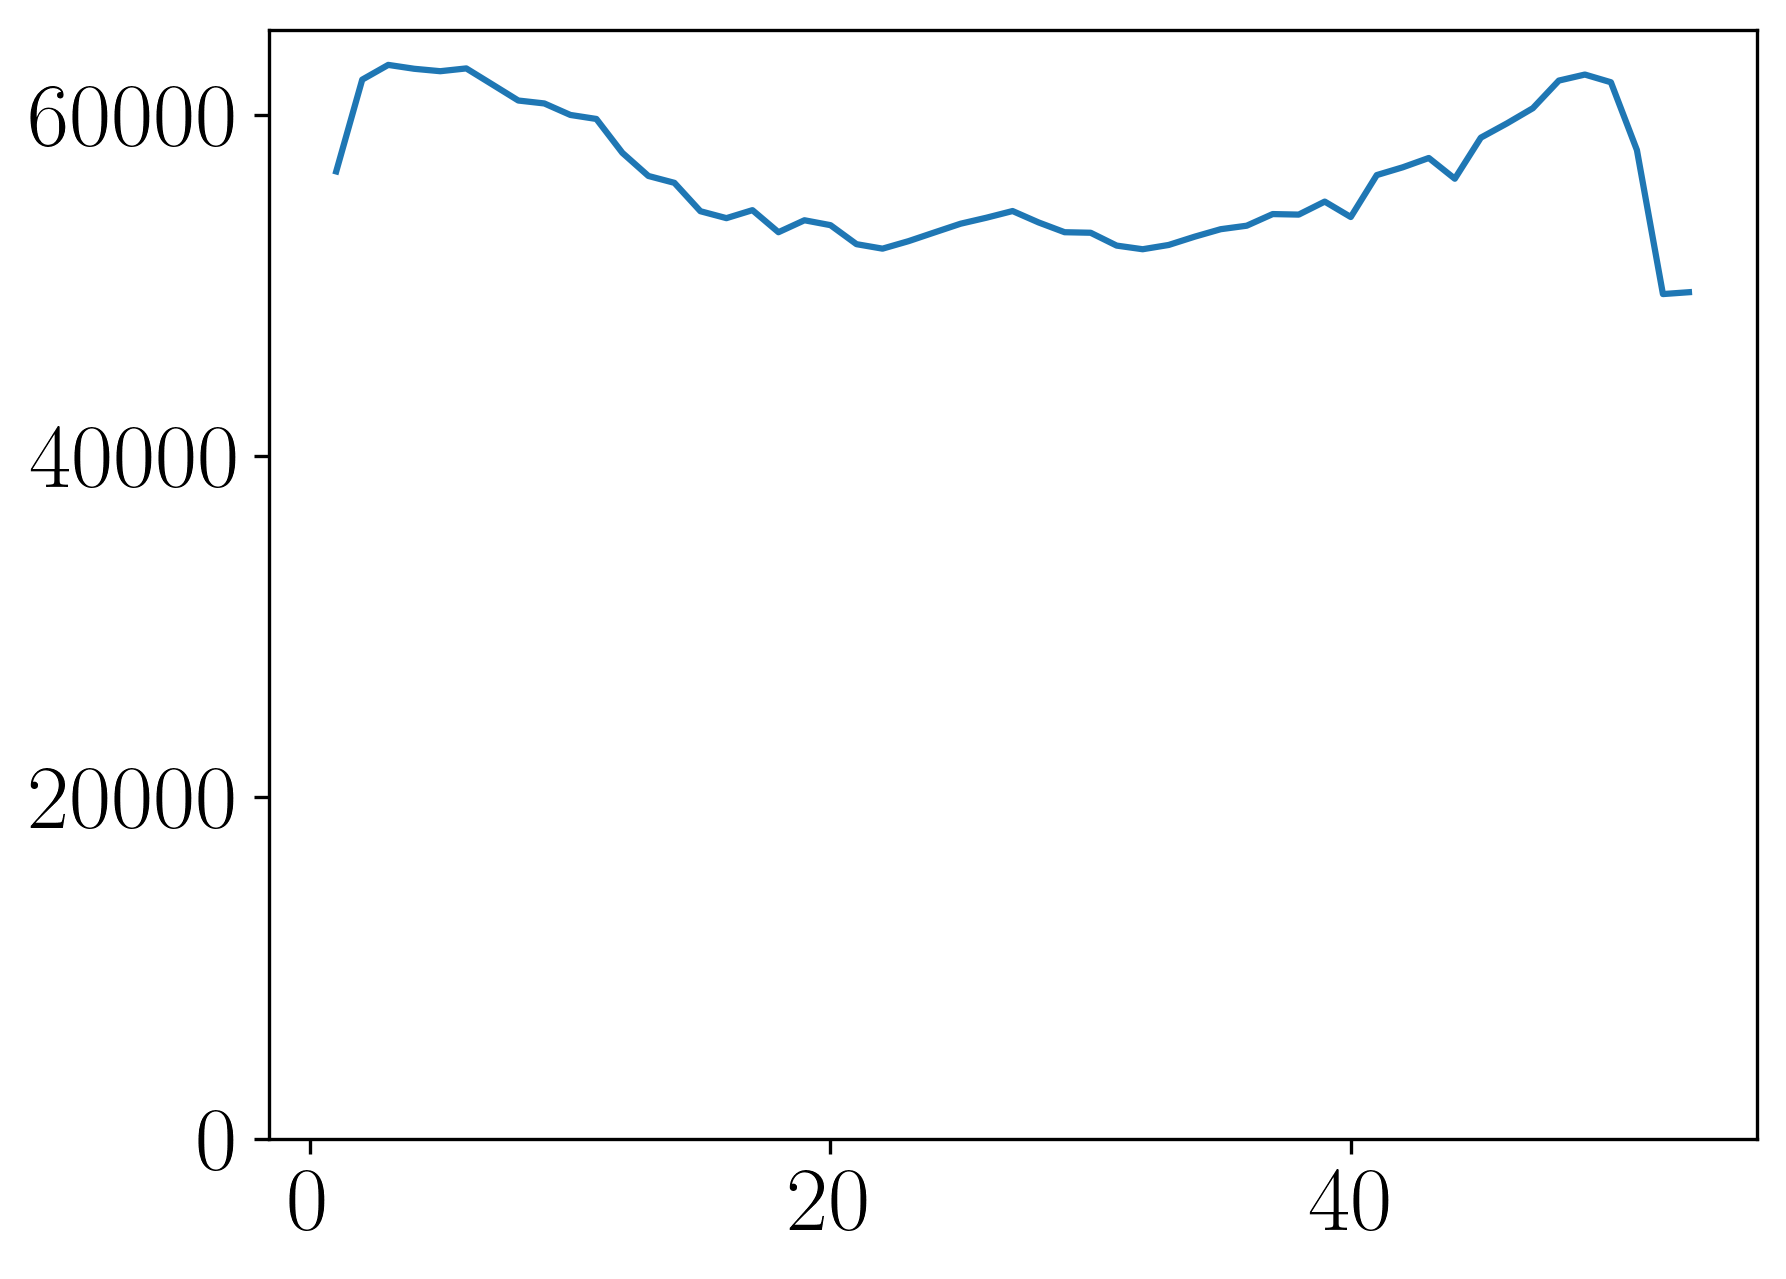

In [ ]:
means_load = df["load"].groupby(df["date"].dt.isocalendar().week).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

(0.0, 65000.0)

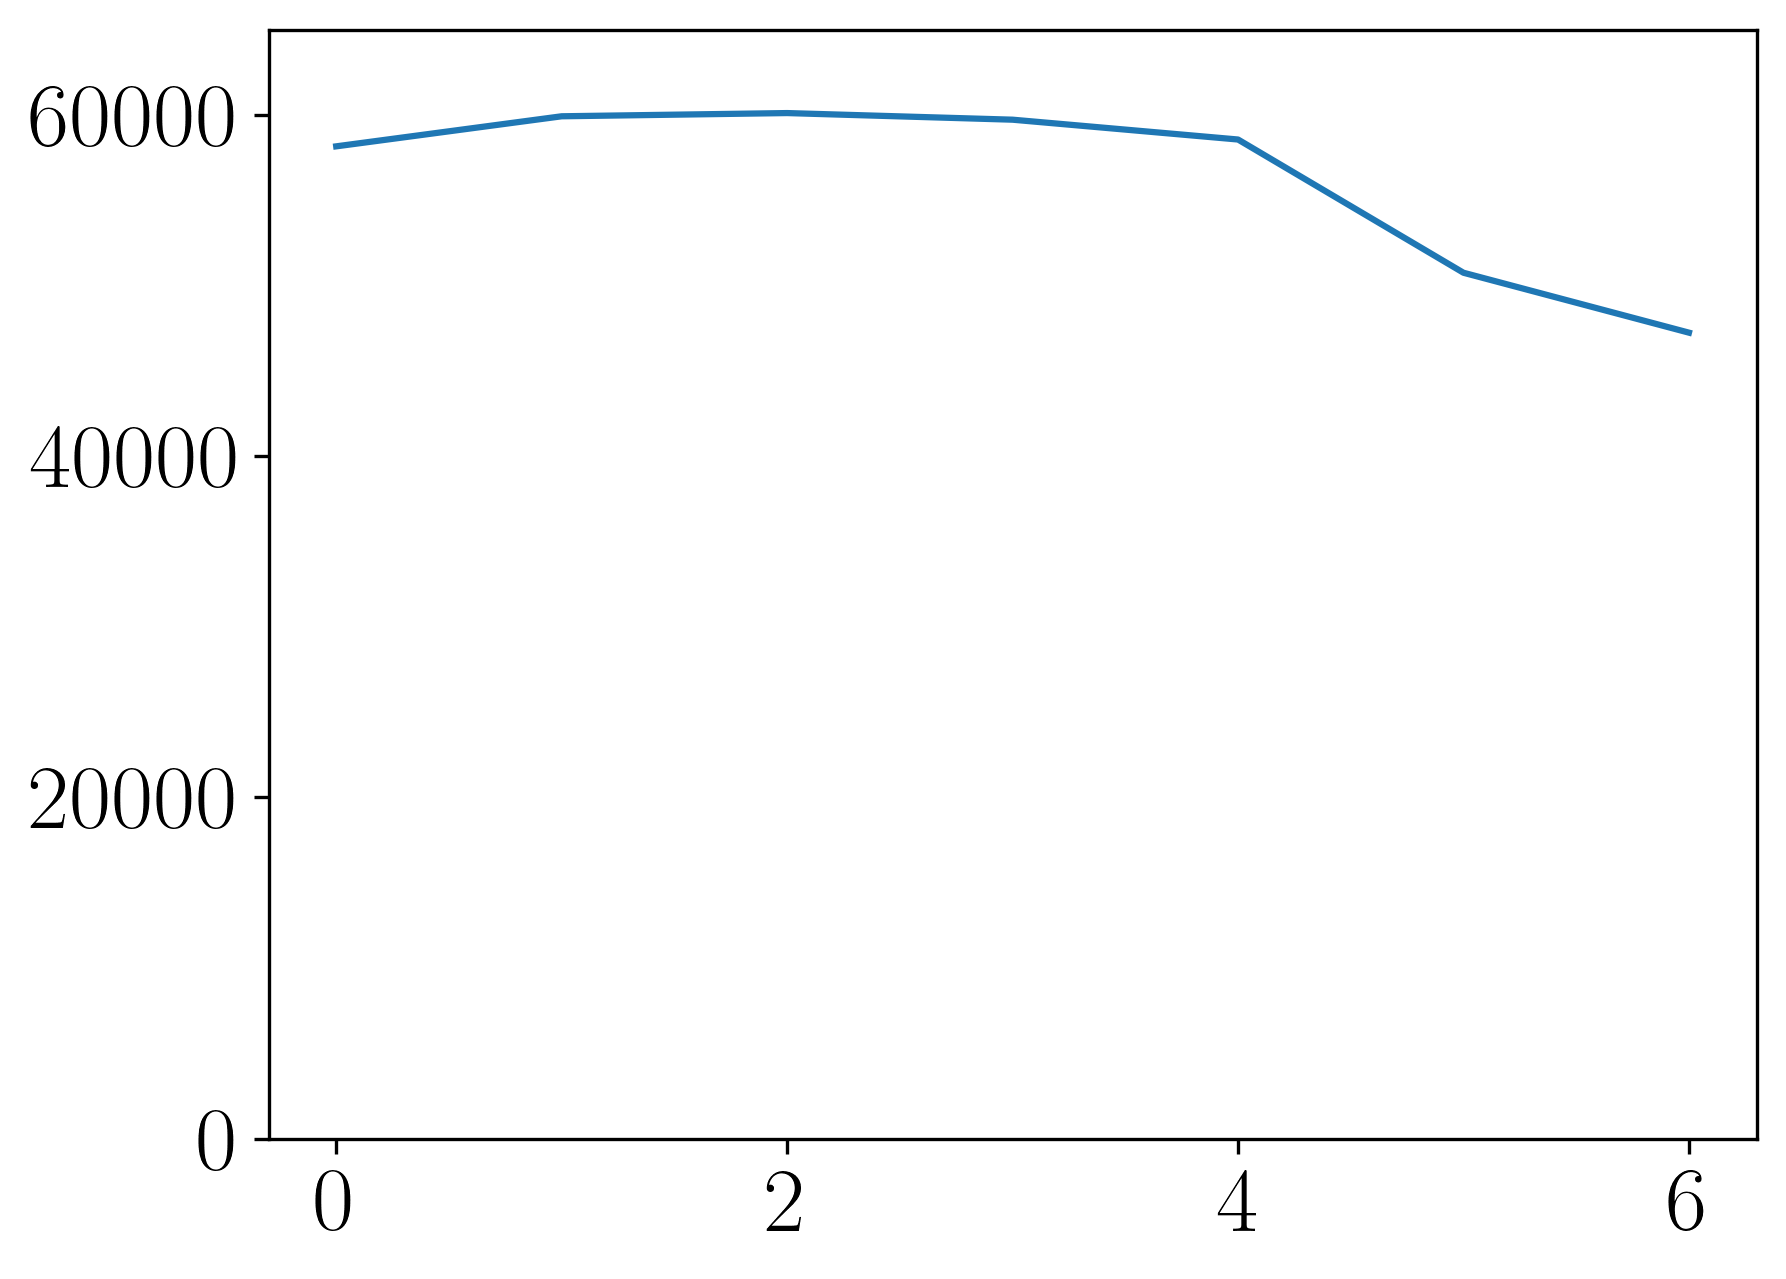

In [ ]:
means_load = df["load"].groupby(df["date"].dt.dayofweek).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

(0.0, 65000.0)

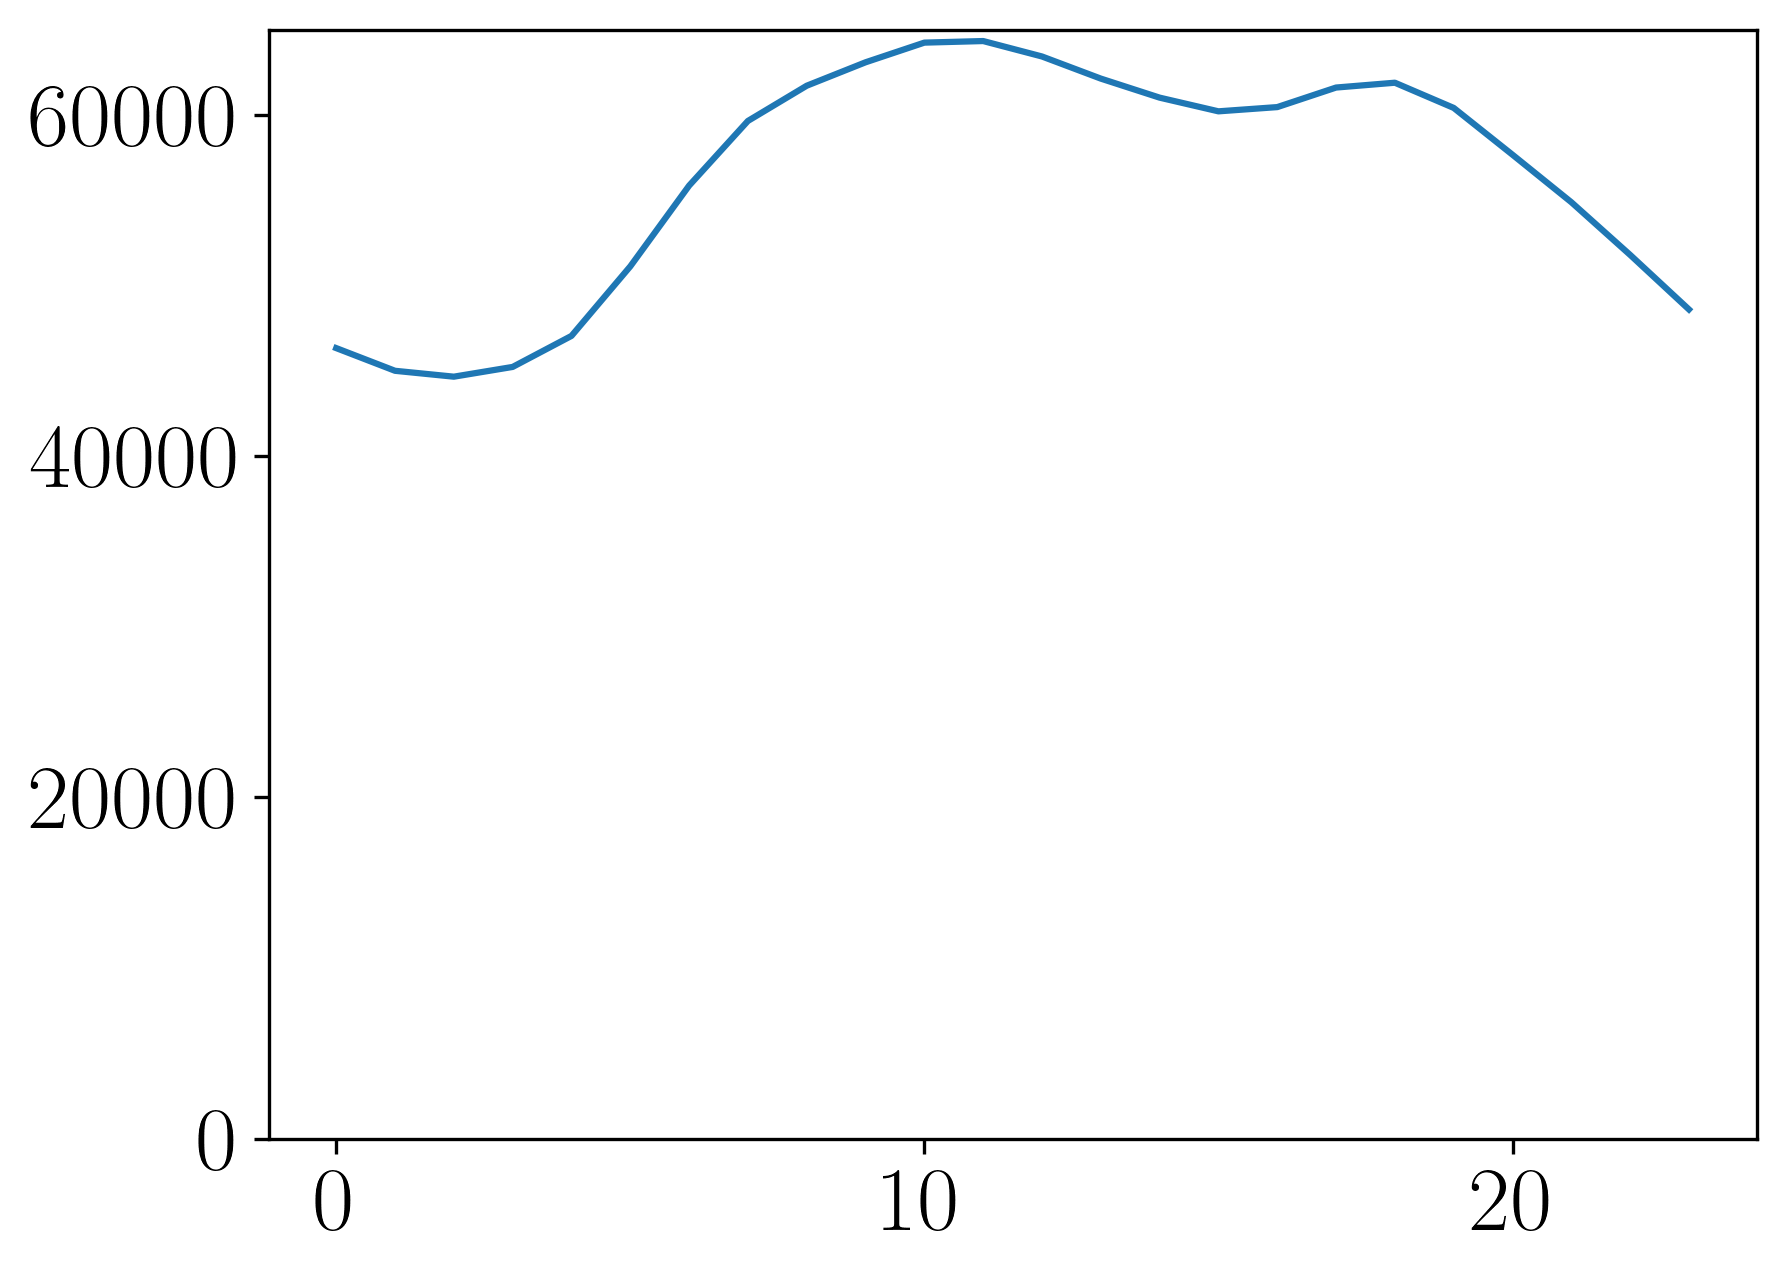

In [ ]:
means_load = df["load"].groupby(df["date"].dt.hour).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

# Wind gen

(0.0, 18000.0)

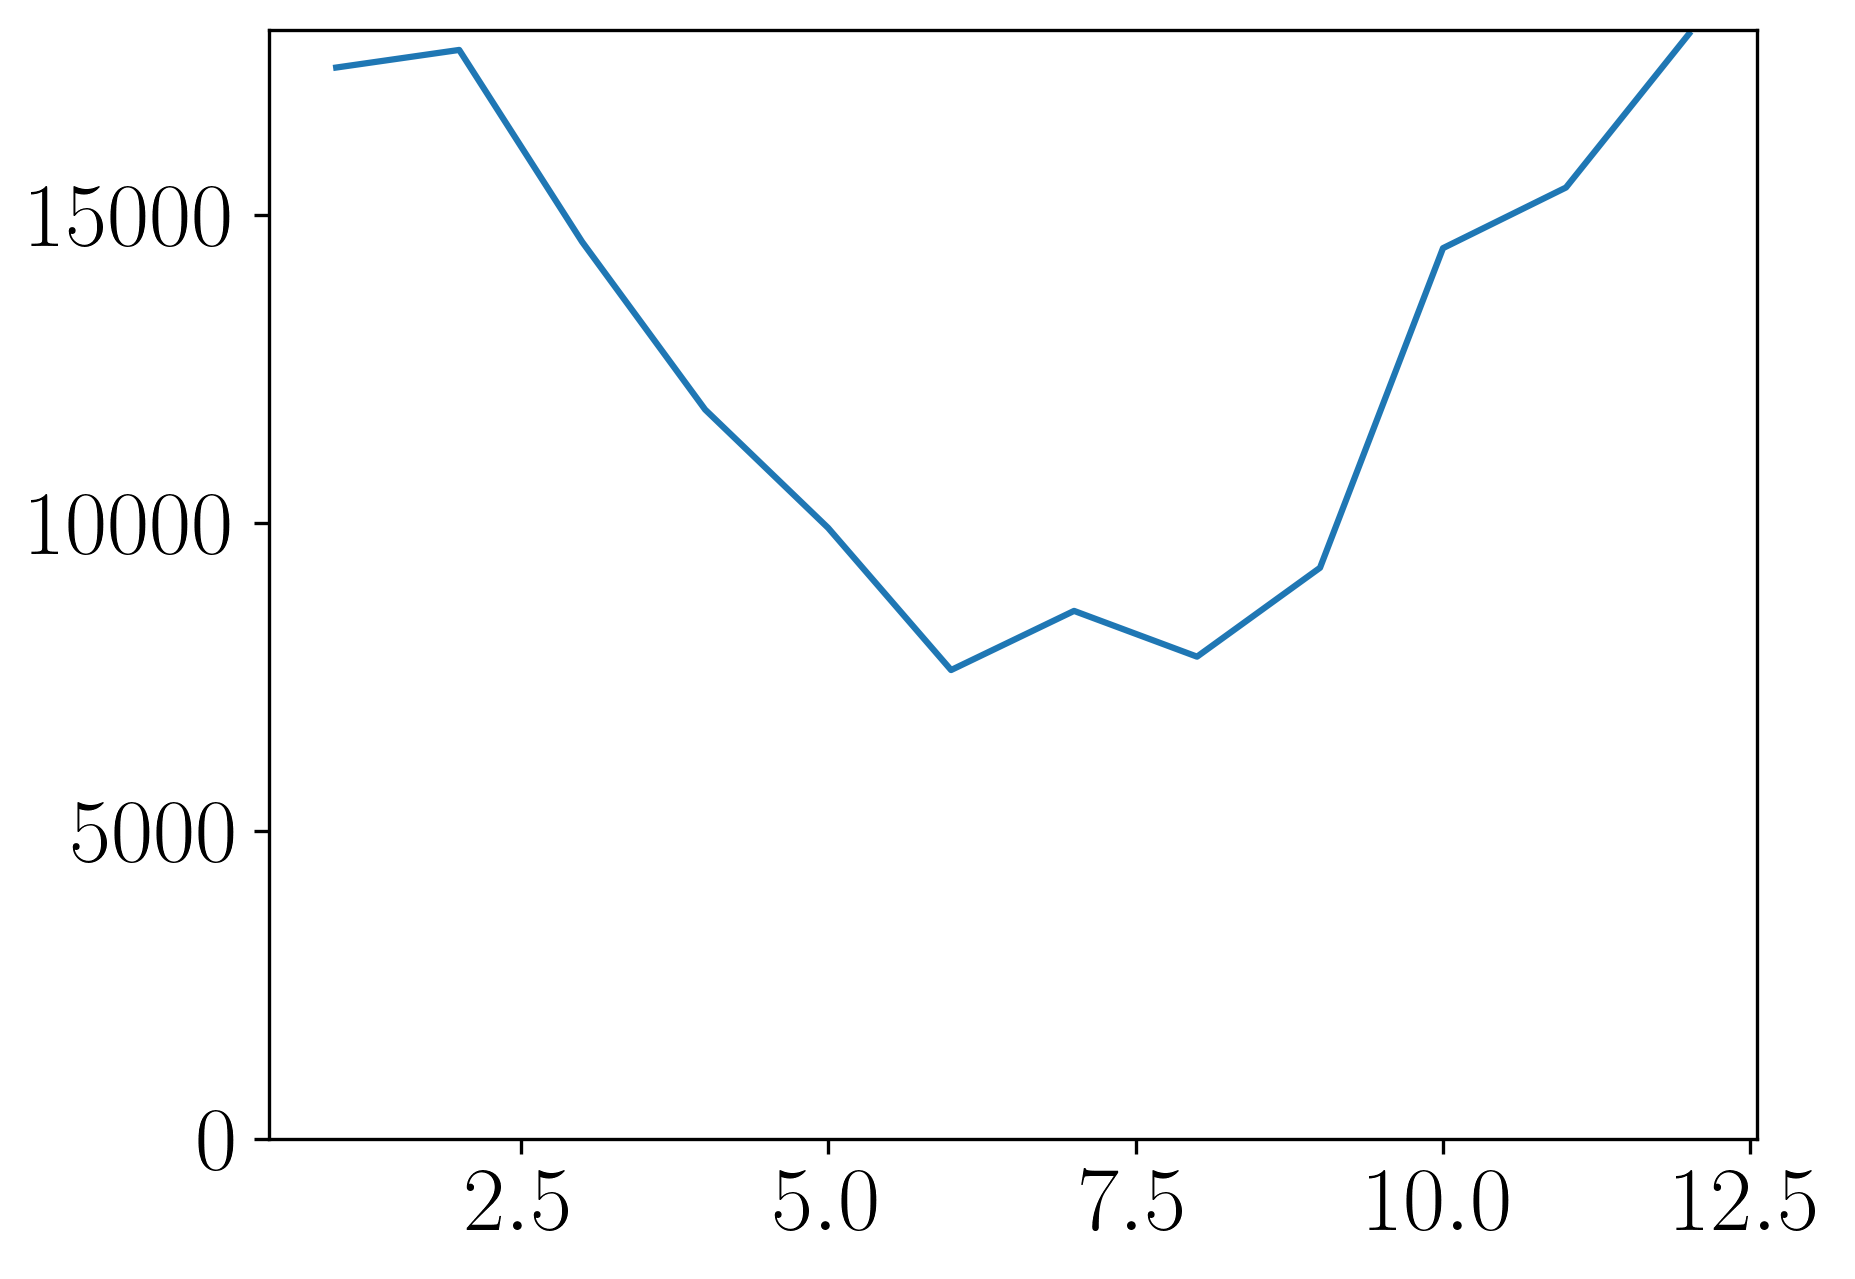

In [ ]:
means_load = df["wind_gen"].groupby(df["date"].dt.month).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 18000)

(0.0, 18000.0)

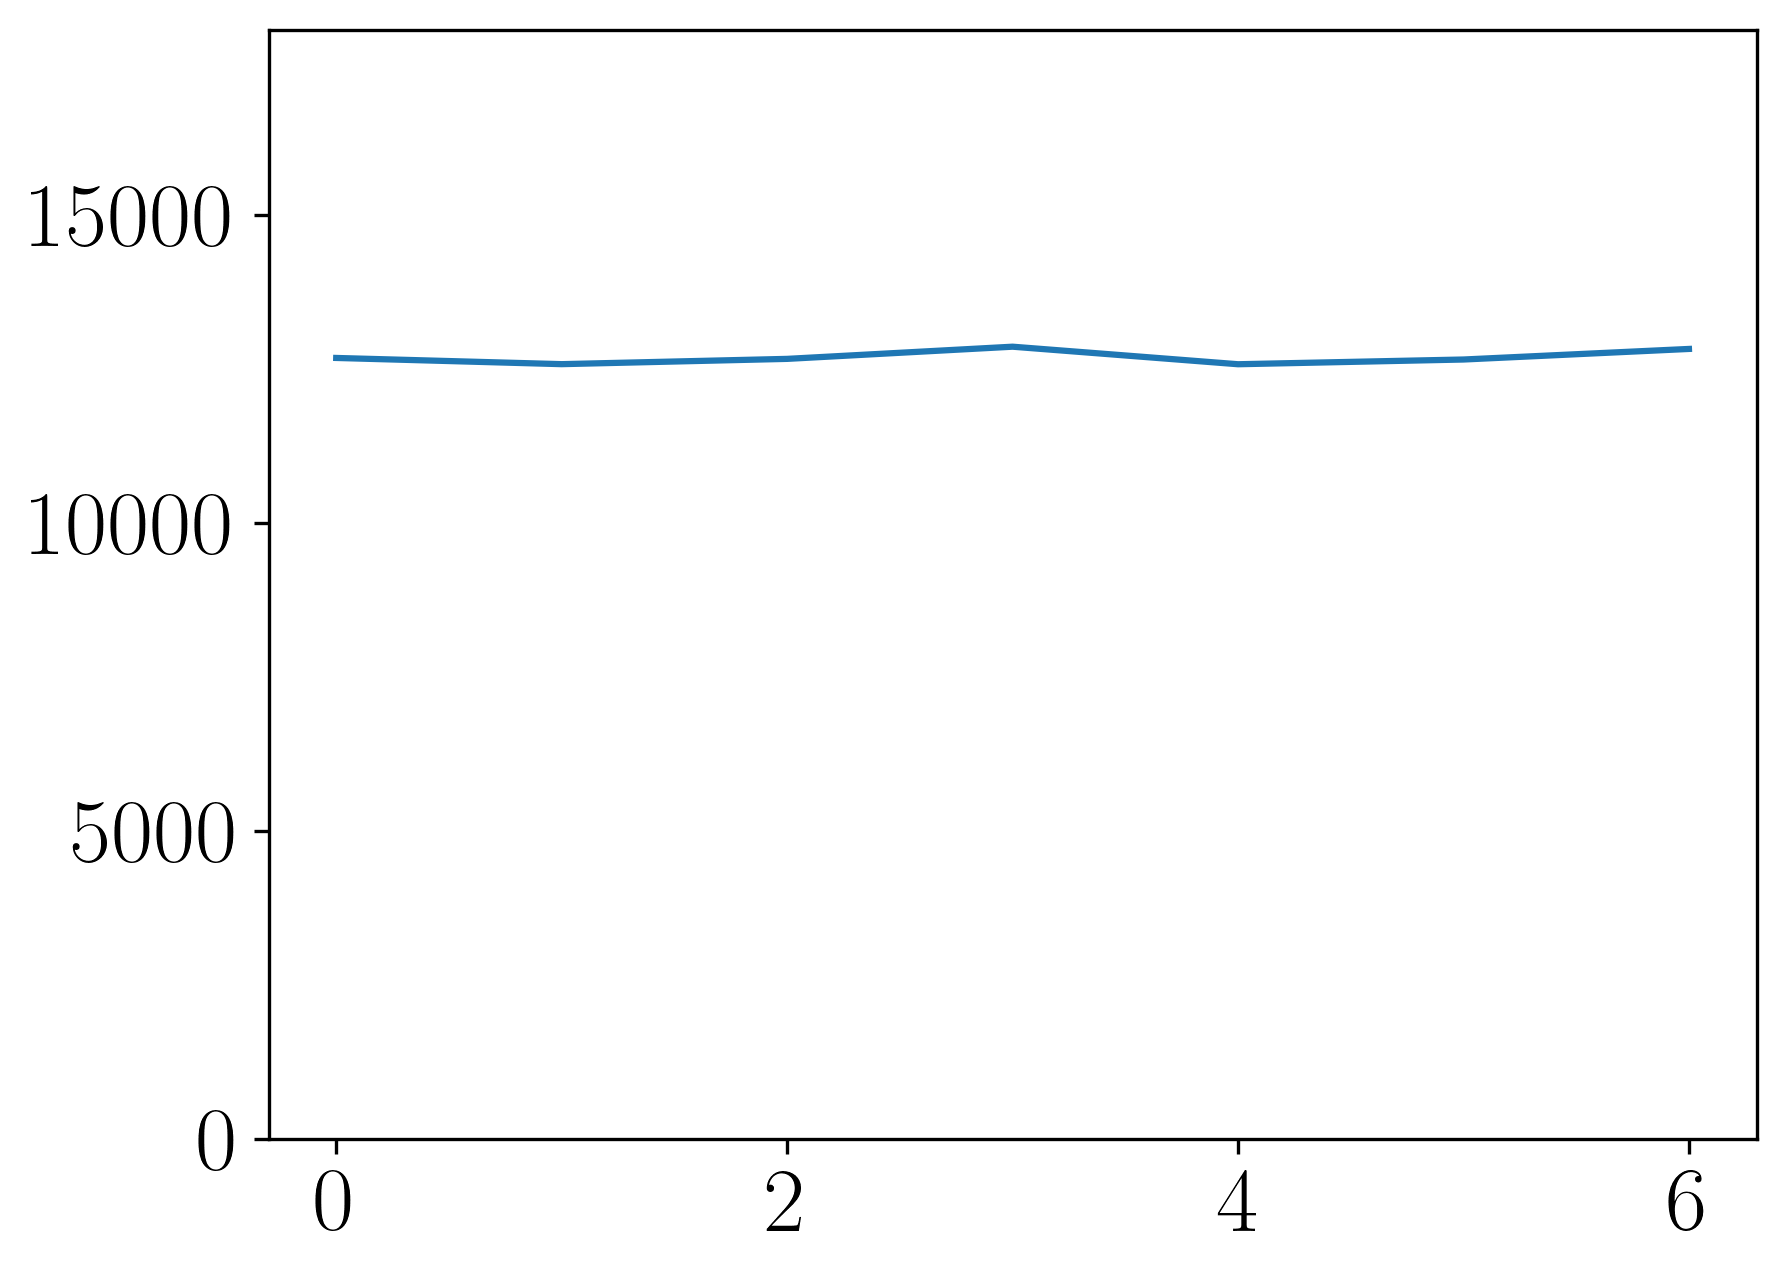

In [ ]:
means_load = df["wind_gen"].groupby(df["date"].dt.dayofweek).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 18000)

(0.0, 18000.0)

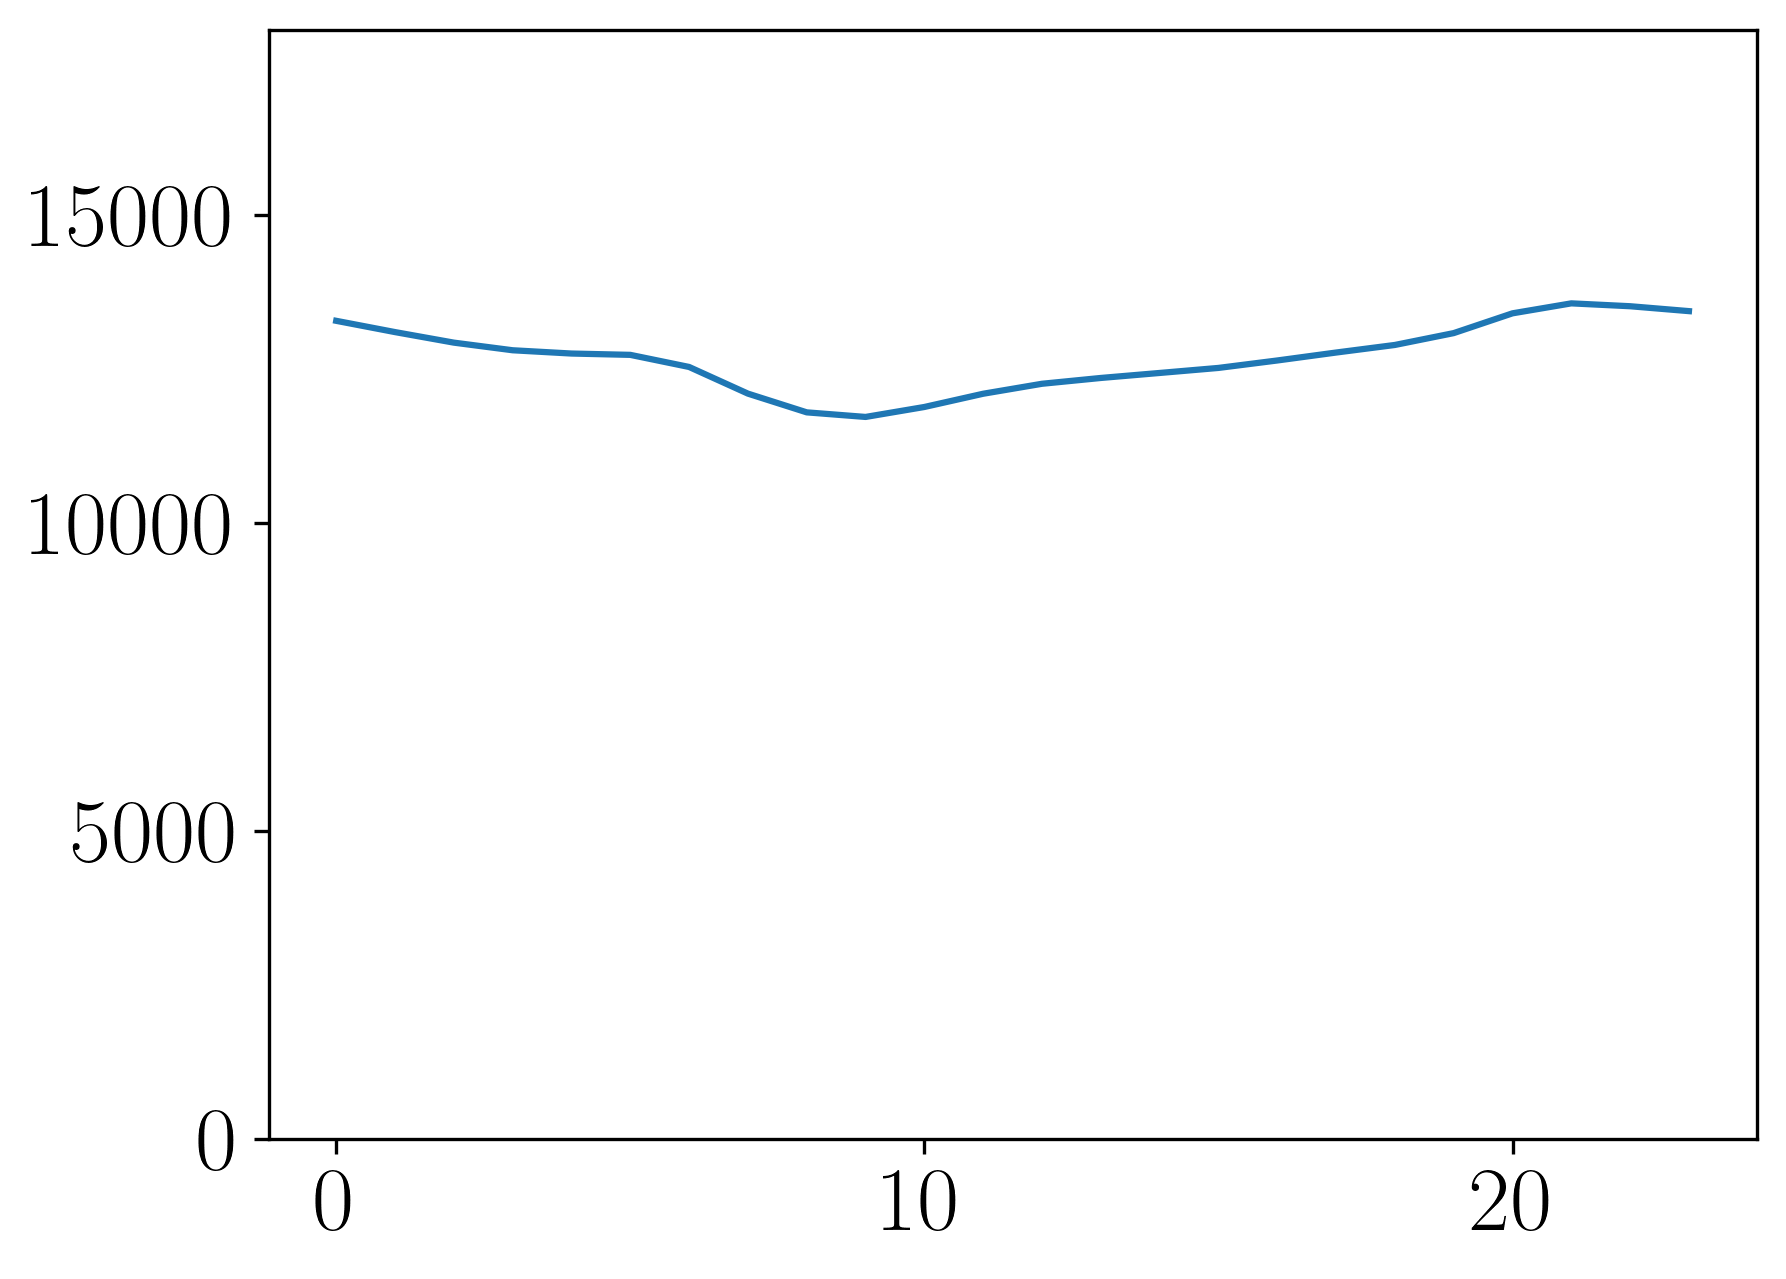

In [ ]:
means_load = df["wind_gen"].groupby(df["date"].dt.hour).mean()
plt.plot(means_load, label="wind_gen")
plt.ylim(0, 18000)